In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

/tmp/ipykernel_60/1994989634.py:11: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account()


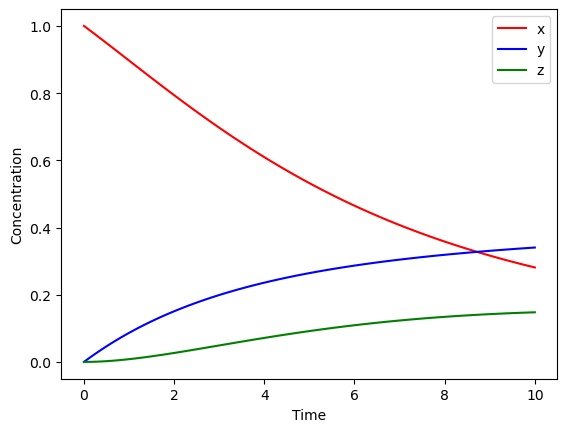

In [1]:
import numpy as np
from scipy.integrate import odeint

# define the ODEs for the BZ reaction
def bz_reaction(y, t, k1, k2, k3):
    x, y, z = y
    dx = -k1*x - k2*x*y + k3*z
    dy = k1*x - k2*x*y
    dz = -k3*z + k2*x*y
    return [dx, dy, dz]

# define the initial conditions and parameters
y0 = [1, 0, 0] # initial concentrations
k1 = 0.1
k2 = 0.2
k3 = 0.1

# define the time range for the simulation
t = np.linspace(0, 10, 100)

# solve the ODEs using odeint
solution = odeint(bz_reaction, y0, t, args=(k1, k2, k3))

# plot the results
import matplotlib.pyplot as plt
x, y, z = solution.T
plt.plot(t, x, 'r', label='x')
plt.plot(t, y, 'b', label='y')
plt.plot(t, z, 'g', label='z')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.show()


In [ ]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
from matplotlib import animation

# Width, height of the image.
nx, ny = 1920, 1800
# Reaction parameters.
alpha, beta, gamma = 1, 1, 1

def update(p,arr):
    """Update arr[p] to arr[q] by evolving in time."""

    # Count the average amount of each species in the 9 cells around each cell
    # by convolution with the 3x3 array m.
    q = (p+1) % 2
    s = np.zeros((3, ny,nx))
    m = np.ones((3,3)) / 9
    for k in range(3):
        s[k] = convolve2d(arr[p,k], m, mode='same', boundary='wrap')
    # Apply the reaction equations
    arr[q,0] = s[0] + s[0]*(alpha*s[1] - gamma*s[2])
    arr[q,1] = s[1] + s[1]*(beta*s[2] - alpha*s[0])
    arr[q,2] = s[2] + s[2]*(gamma*s[0] - beta*s[1])
    # Ensure the species concentrations are kept within [0,1].
    np.clip(arr[q], 0, 1, arr[q])
    return arr

# Initialize the array with random amounts of A, B and C.
arr = np.random.random(size=(5, 8, ny, nx))

# Set up the image
fig, ax = plt.subplots()
im = ax.imshow(arr[0,0], cmap=plt.cm.winter)
ax.axis('off')

def animate(i, arr):
    """Update the image for iteration i of the Matplotlib animation."""

    arr = update(i % 2, arr)
    im.set_array(arr[i % 2, 0])
    return [im]

anim = animation.FuncAnimation(fig, animate, frames=200, interval=5,
                               blit=False, fargs=(arr,))

# To view the animation, uncomment this line
plt.show()

# To save the animation as an MP4 movie, uncomment this line
anim.save(filename='bz.mp4', fps=144)

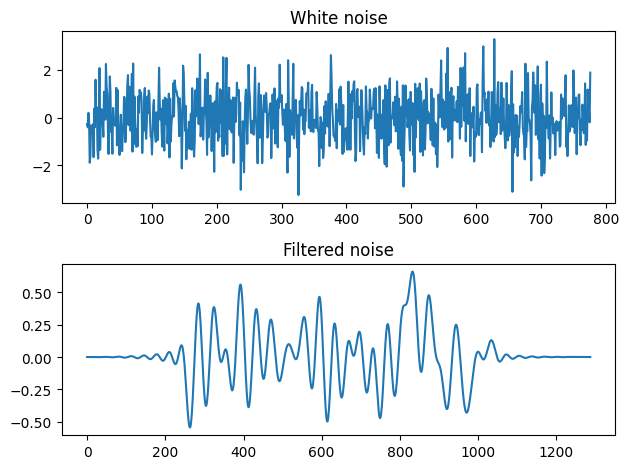

In [11]:
import numpy as np
from scipy import signal
rng = np.random.default_rng()
sig = rng.standard_normal(777)
filt = signal.firwin(512, 0.0618033)
fsig = signal.oaconvolve(sig, filt)
import matplotlib.pyplot as plt
fig, (ax_orig, ax_mag) = plt.subplots(2, 1)
ax_orig.plot(sig)
ax_orig.set_title('White noise')
ax_mag.plot(fsig)
ax_mag.set_title('Filtered noise')
fig.tight_layout()
fig.show()

In [ ]:
!pip install sounddevice

In [ ]:
import numpy as np
from scipy import signal
import sounddevice as sd
from scipy.io import wavfile
import matplotlib.pyplot as plt

# Generate white noise signal
rng = np.random.default_rng()
sig = rng.standard_normal(777)

# Define the FIR filter
filt = signal.firwin(512, 0.0618033)

# Apply the filter to the white noise signal
fsig = signal.oaconvolve(sig, filt)

# Define the audio sample rate
sample_rate = 44100

# Play the filtered noise as audio
sd.play(fsig, sample_rate)

# Save the filtered noise as a WAV file
wavfile.write('C:\\filtered_noise.wav', sample_rate, fsig)

# Plot the original and filtered signals
fig, (ax_orig, ax_mag) = plt.subplots(2, 1)
ax_orig.plot(sig)
ax_orig.set_title('White noise')
ax_mag.plot(fsig)
ax_mag.set_title('Filtered noise')
fig.tight_layout()
plt.show()


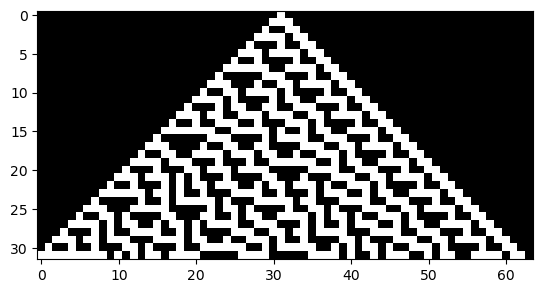

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize the state with the value of 1 shifted left by 31 bits
state = 1 << 31

# Create an empty 2D array to store the pattern
data = []

# Iterate over 32 rows
for i in range(32):
    # Create an empty list for the current row
    row = []
    # Iterate over 64 columns
    for j in range(64):
        # Append 1 to the current row if the corresponding bit in state is 1, else append 0
        row.append(1 if state >> j & 1 else 0)
    # Append the current row to the data array
    data.append(row)
    # Update the state using bitwise operations
    state = (state >> 1) ^ (state | state << 1)

# Display the pattern using matplotlib's imshow function with a grayscale colormap
plt.imshow(data, cmap='gray')
plt.show()



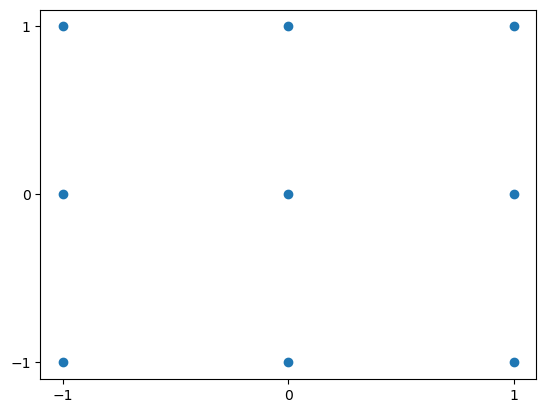

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Create an array of the 9 possible positions of a cellular automaton
positions = np.array([[0,0], [0,1], [1,0], [1,1], [-1,0], [-1,1], [0,-1], [1,-1],[-1,-1]])

x, y = positions.T

fig, ax = plt.subplots()
ax.set_xticks(range(-1, 2))
ax.set_yticks(range(-1, 2))
ax.scatter(x, y)
plt.show()



In [9]:
import torch
from torch.optim.optimizer import Optimizer

class CustomOptimizer(Optimizer):
    def __init__(self, params, lr=1e-3, momentum=0.9, weight_decay=0, d_dim=0, k=0, alpha=0):
        defaults = dict(lr=lr, momentum=momentum, weight_decay=weight_decay, d_dim=d_dim, k=k, alpha=alpha)
        super(CustomOptimizer, self).__init__(params, defaults)
        
    def step(self):
        for group in self.param_groups:
            lr = group['lr']
            momentum = group['momentum']
            weight_decay = group['weight_decay']
            d_dim = group['d_dim']
            k = group['k']
            alpha = group['alpha']
            momentum_buffer = group['momentum_buffer']
            
            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data
                # reshape grad to 2D
                grad_2d = grad.reshape(-1, d_dim)
                # SVD decomposition
                U, S, V = torch.svd(grad_2d)
                # keep top k singular vectors
                G_k = U[:, :k] @ torch.diag(S[:k]) @ V[:, :k].T
                # keep top 2k singular vectors
                G_2k = U[:, :2*k] @ torch.diag(S[:2*k]) @ V[:, :2*k].T
                # normalize G_k
                G_k /= torch.norm(G_2k, p=2)
                # truncate G_k
                threshold = torch.quantile(torch.abs(G_k), alpha)
                G_k[torch.abs(G_k) < threshold] = 0
                # apply momentum
                if momentum_buffer is None:
                    momentum_buffer = torch.zeros_like(G_k)
                else:
                    momentum_buffer.mul_(momentum).add_(G_k)
                # update parameters
                p.data.add_(-lr * momentum_buffer)
                # apply weight decay
                if weight_decay != 0:
                    p.data.add_(-weight_decay * lr, p.data)


In [10]:
import torch
from torch.optim import Optimizer

class CustomOptimizer(Optimizer):
    def __init__(self, params, lr=1e-3, momentum=0.9, weight_decay=0, d_dim=0, k=0, alpha=0):
        defaults = dict(lr=lr, momentum=momentum, weight_decay=weight_decay, d_dim=d_dim, k=k, alpha=alpha)
        super().__init__(params, defaults)

    def step(self, closure=None):
        for group in self.param_groups:
            lr = group['lr']
            momentum = group['momentum']
            weight_decay = group['weight_decay']
            d_dim = group['d_dim']
            k = group['k']
            alpha = group['alpha']

            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data

                # Reshape gradient to 2D and perform SVD
                u, s, v = torch.svd(grad.reshape(grad.shape[0], -1))

                # Keep top k and 2k singular vectors
                wk = torch.mm(torch.mm(u[:, :k], torch.diag(s[:k])), v[:, :k].t())
                w2k = torch.mm(torch.mm(u[:, :2*k], torch.diag(s[:2*k])), v[:, :2*k].t())

                # Normalize wk using momentum of F-norm of w2k
                fnorm = torch.norm(w2k, 'fro')
                if fnorm > 0:
                    wk_norm = wk / fnorm
                else:
                    wk_norm = wk

                # Truncate coordinates of wk to top alpha percentile
                alpha_val = torch.kthvalue(torch.abs(wk_norm).flatten(), int(alpha * wk_norm.numel()))[0]
                wk_trunc = torch.where(torch.abs(wk_norm) > alpha_val, wk_norm, torch.zeros_like(wk_norm))

                # Apply momentum and weight decay
                state = self.state[p]
                if 'momentum_buffer' not in state:
                    state['momentum_buffer'] = torch.zeros_like(wk_trunc)
                momentum_buffer = state['momentum_buffer']
                momentum_buffer.mul_(momentum).add_(wk_trunc)
                p.data.add_(-lr, momentum_buffer)
                if weight_decay != 0:
                    p.data.add_(-weight_decay * lr, p.data)

        return None



In [11]:

class CellularAutomaton:
    def __init__(self, rows, cols):
        self.rows = rows
        self.cols = cols
        self.state = [[0 for _ in range(cols)] for _ in range(rows)]

    def jcrule(self, row, col):
        count = (self.state[row-1][col-1] + self.state[row-1][col] + self.state[row-1][col+1] +
                 self.state[row][col-1] + self.state[row][col] + self.state[row][col+1] +
                 self.state[row+1][col-1] + self.state[row+1][col] + self.state[row+1][col+1])
        if self.state[row][col] == 2:
            return 0
        if self.state[row][col] == 1:
            return 2
        return 1 if count == 2 else 0
        
    def update(self):
        new_state = [[0 for _ in range(self.cols)] for _ in range(self.rows)]
        for row in range(1, self.rows-1):
            for col in range(1, self.cols-1):
                new_state[row][col] = self.jcrule(row, col)
        self.state = new_state

automaton = CellularAutomaton(100, 100)
automaton.state = [[1 if i == 64 and j == 32 else 0 for j in range(100)] for i in range(100)]

for i in range(10):
    automaton.update()
    #print(automaton.state)


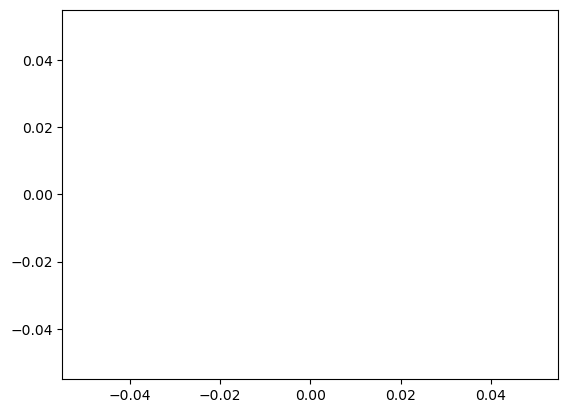

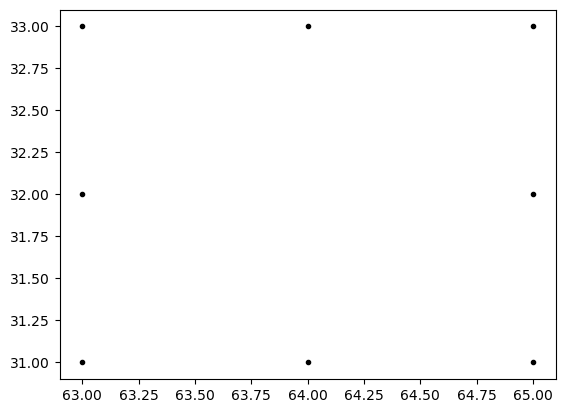

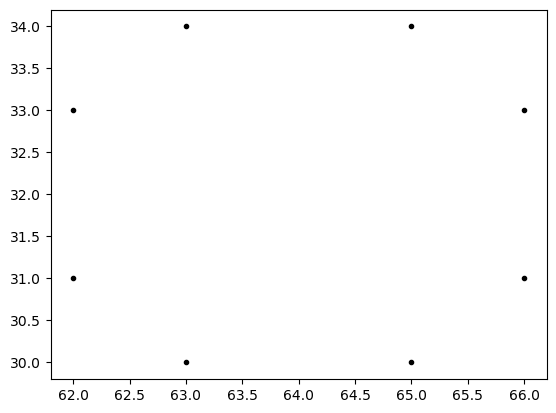

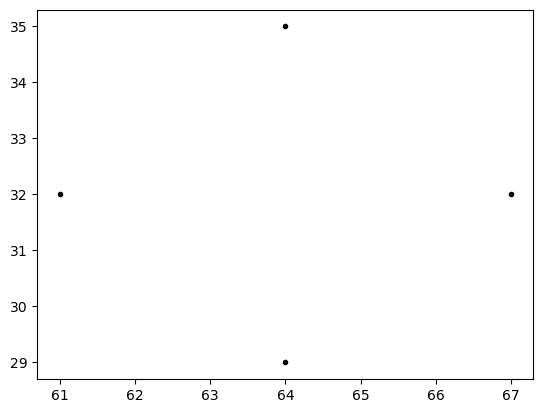

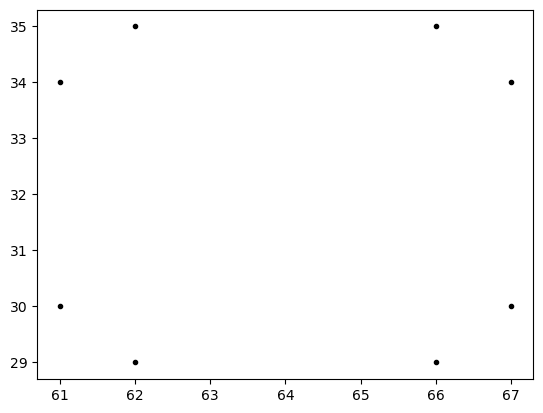

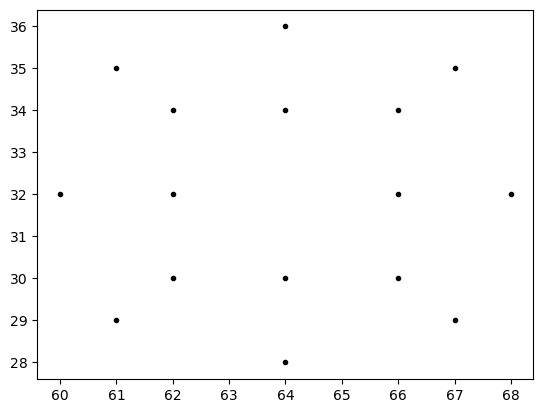

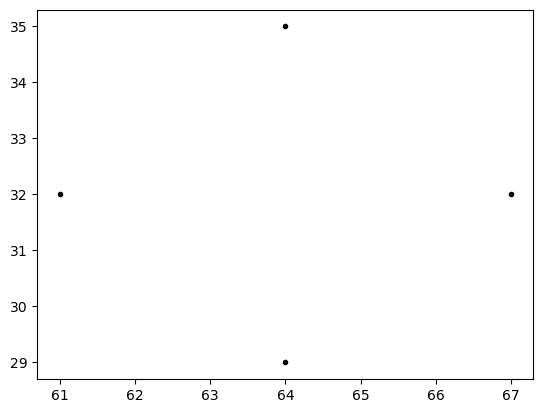

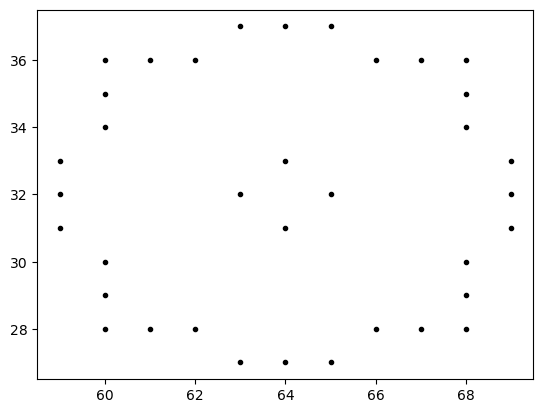

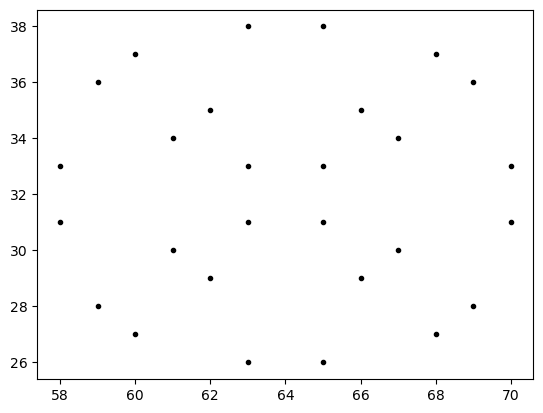

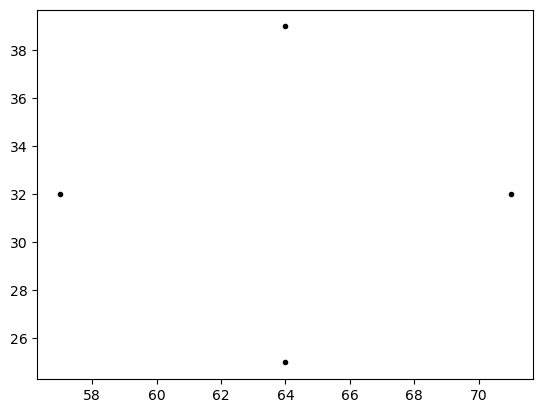

In [12]:
import matplotlib.pyplot as plt

class CellularAutomaton:
    def __init__(self, rows, cols):
        self.rows = rows
        self.cols = cols
        self.state = [[0 for _ in range(cols)] for _ in range(rows)]

    def jcrule(self, row, col):
        count = (self.state[row-1][col-1] + self.state[row-1][col] + self.state[row-1][col+1] +
                 self.state[row][col-1] + self.state[row][col] + self.state[row][col+1] +
                 self.state[row+1][col-1] + self.state[row+1][col] + self.state[row+1][col+1])
        if self.state[row][col] == 2:
            return 0
        if self.state[row][col] == 1:
            return 2
        return 1 if count == 2 else 0
        
    def update(self):
        new_state = [[0 for _ in range(self.cols)] for _ in range(self.rows)]
        for row in range(1, self.rows-1):
            for col in range(1, self.cols-1):
                new_state[row][col] = self.jcrule(row, col)
        self.state = new_state

automaton = CellularAutomaton(100, 100)
automaton.state = [[1 if i == 64 and j == 32 else 0 for j in range(100)] for i in range(100)]

for i in range(10):
    automaton.update()
    x, y = np.where(np.array(automaton.state) == 1)
    fig, ax = plt.subplots()
    ax.scatter(x, y, marker='.', c='black')
    #plt.show()




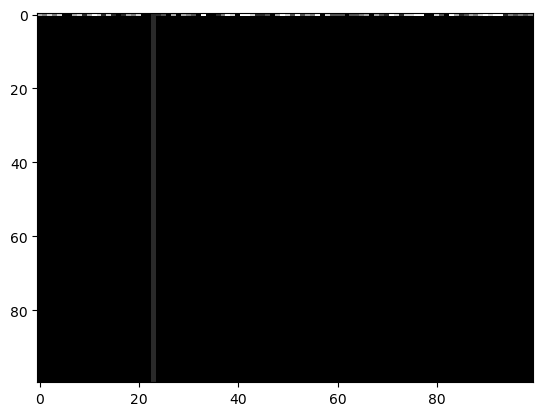

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Set the number of rows to generate
n = 100

# Initialize the first row of the automaton with a random binary pattern
row = np.random.randint(7, size=n)

# Initialize the automaton as a 2D array with the first row
automaton = np.array([row])

# Define the function that generates the next row
def next_row(row):
    next_row = np.zeros(n)
    for i in range(n):
        left = row[i-1] if i > 0 else row[-1]
        center = row[i]
        right = row[(i+1) % n]
        state = (left * 4 + center * 2 + right)
        next_row[i] = 1 if state == 2 or state == 3 else 0
    return next_row

# Generate the next rows
for i in range(n-1):
    automaton = np.append(automaton, [next_row(automaton[-1])], axis=0)

# Plot the automaton
plt.imshow(automaton, cmap='gray', aspect='auto')
plt.show()


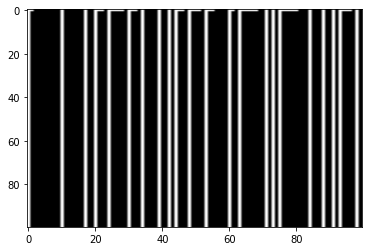

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Set the number of rows and columns to generate
n_rows = 100
n_cols = 100

# Initialize the first row of the automaton with a random binary pattern
row = np.random.randint(2, size=n_cols)

# Initialize the automaton as a 2D array with the first row
automaton = np.array([row])

# Define the function that generates the next row
def next_row(row):
    next_row = np.zeros(n_cols)
    for i in range(n_cols):
        left = row[i-1] if i > 0 else row[-1]
        center = row[i]
        right = row[(i+1) % n_cols]
        state = (left * 4 + center * 2 + right)
        next_row[i] = 1 if state == 2 or state == 3 else 0
    return next_row

# Generate the next rows
for i in range(n_rows-1):
    automaton = np.append(automaton, [next_row(automaton[-1])], axis=0)

# Plot the automaton
plt.imshow(automaton, cmap='gray', aspect='auto')
plt.show()


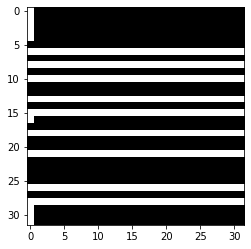

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Set the number of rows to generate
n = 32

# Initialize the first row of the automaton with a random binary pattern
row = np.random.randint(2, size=n)

# Initialize the automaton as a 2D array with the first row
automaton = np.array([row])

# Define the function that generates the next row
def next_row(row):
    next_row = np.zeros(n)
    for i in range(n):
        left = row[i-1] if i > 0 else row[-1]
        center = row[i]
        right = row[(i+1) % n]
        state = (left * 4 + center * 2 + right)
        next_row[i] = 1 if state == 2 or state == 3 else 0
    return next_row

# Generate the next rows
for i in range(n-1):
    automaton = np.append(automaton, [next_row(automaton[-1])], axis=0)

# Transpose the automaton to rotate it
automaton = automaton.T

# Plot the automaton
plt.imshow(automaton, cmap='gray')
plt.show()


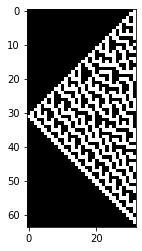

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize the state with the value of 1 shifted left by 31 bits
state = 1 << 31

# Create an empty 2D array to store the pattern
data = []

# Iterate over 32 rows
for i in range(32):
    # Create an empty list for the current row
    row = []
    # Iterate over 64 columns
    for j in range(64):
        # Append 1 to the current row if the corresponding bit in state is 1, else append 0
        row.append(1 if state >> j & 1 else 0)
    # Append the current row to the data array
    data.append(row)
    # Update the state using bitwise operations
    state = (state >> 1) ^ (state | state << 1)

# Transpose the data to rotate it
data = np.array(data).T

# Plot the automaton
plt.imshow(data, cmap='gray')
plt.show()


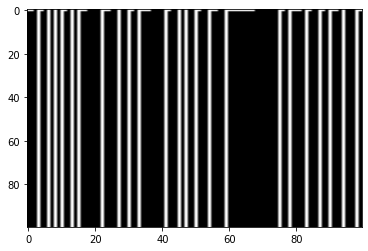

In [15]:

import numpy as np
import matplotlib.pyplot as plt

# Set the number of rows to generate
n = 100

# Set the number of neighbors to consider
neighbors = 3

# Initialize the first row of the automaton with a random binary pattern
row = np.random.randint(2, size=n)

# Initialize the automaton as a 2D array with the first row
automaton = np.array([row])

# Define the function that generates the next row
def next_row(row):
    next_row = np.zeros(n)
    for i in range(n):
        # Get the states of the neighbors
        left = row[i-1] if i > 0 else row[-1]
        center = row[i]
        right = row[(i+1) % n]
        # Determine the state of the current cell based on the states of the neighbors
        state = (left * 4 + center * 2 + right)
        next_row[i] = 1 if state == 2 or state == 3 else 0
    return next_row

# Generate the next rows
for i in range(n-1):
    automaton = np.append(automaton, [next_row(automaton[-1])], axis=0)

# Plot the automaton
plt.imshow(automaton, cmap='gray', aspect='auto')
plt.show()


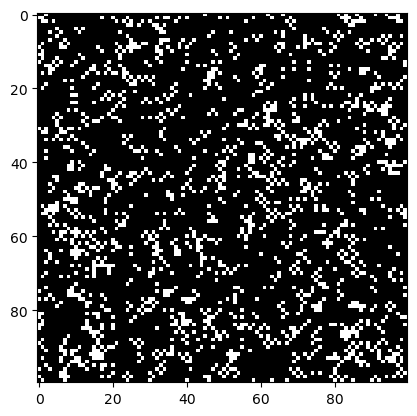

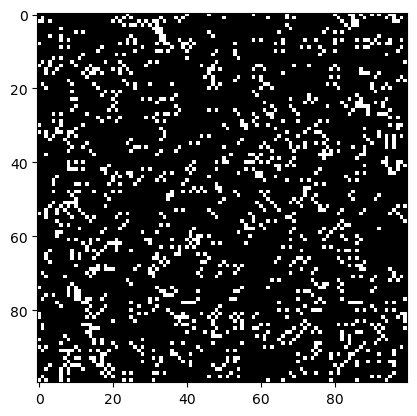

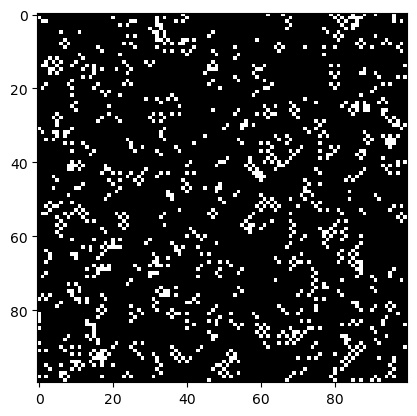

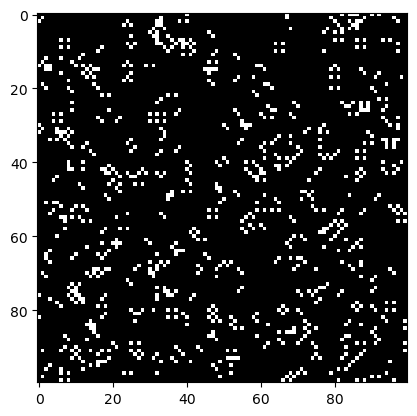

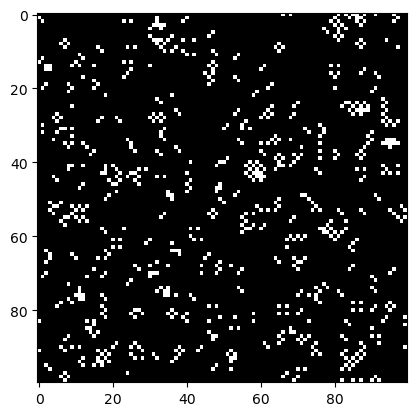

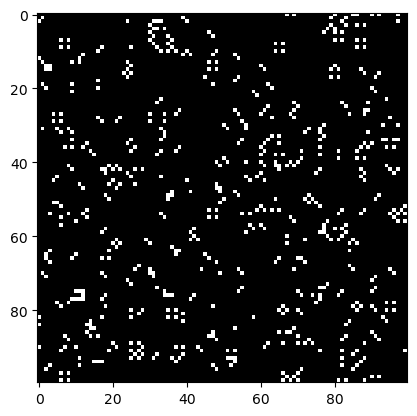

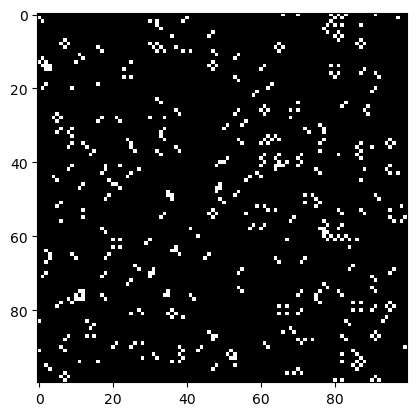

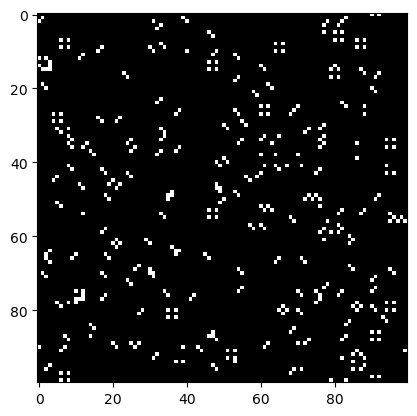

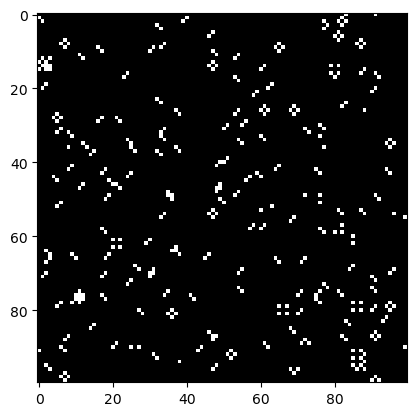

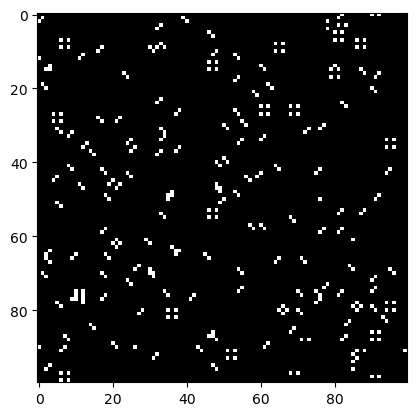

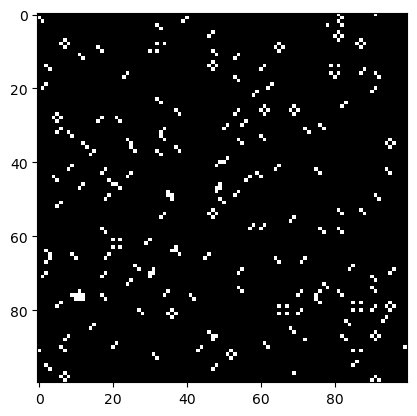

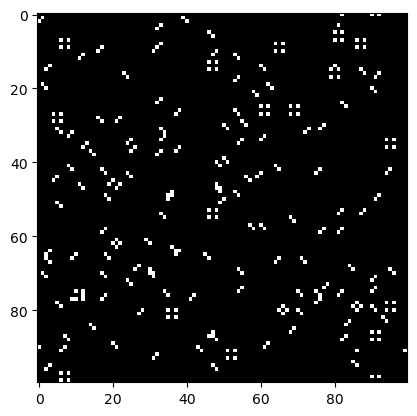

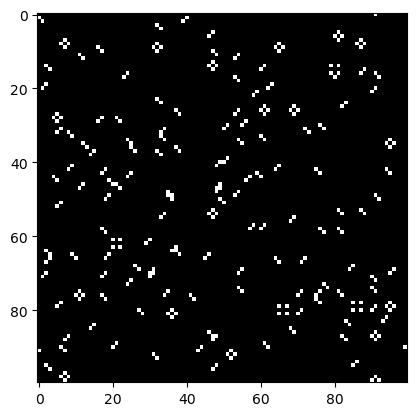

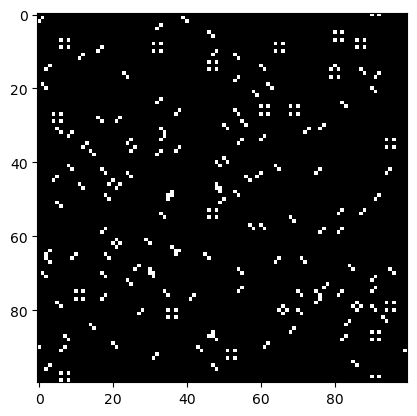

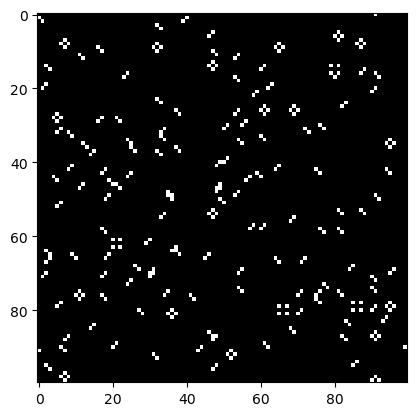

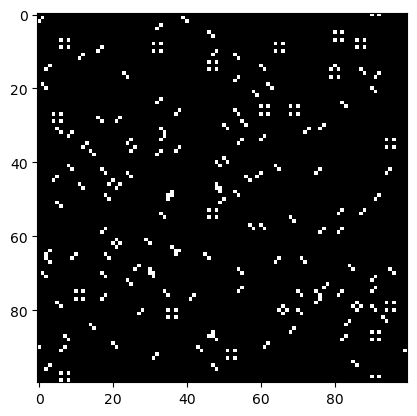

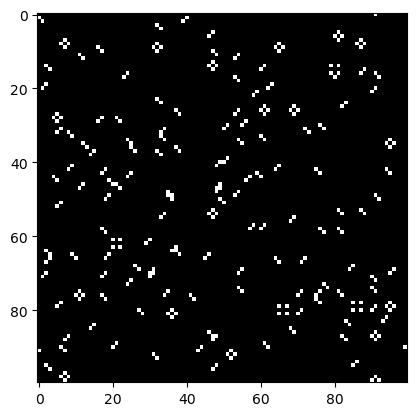

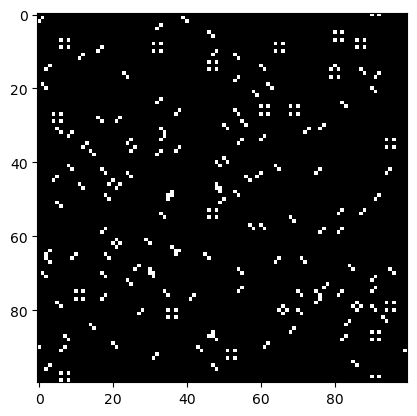

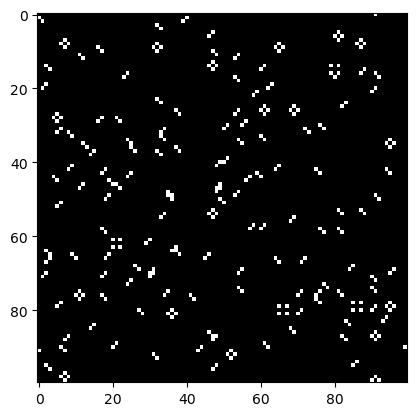

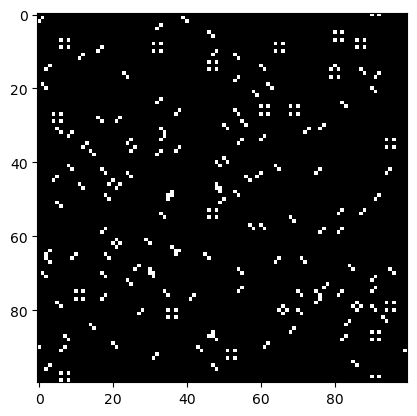

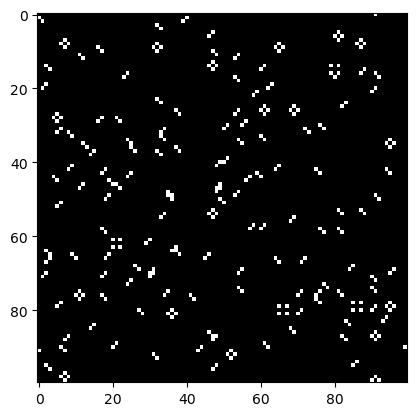

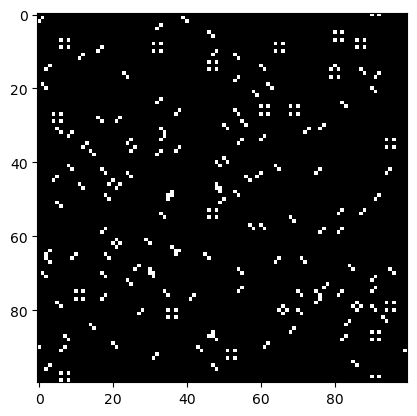

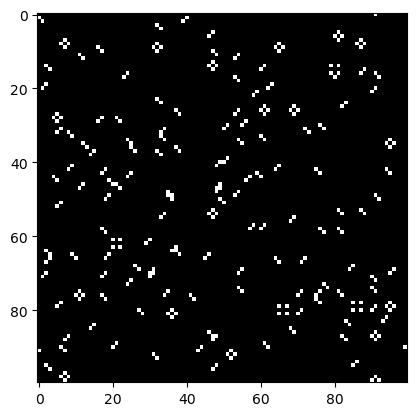

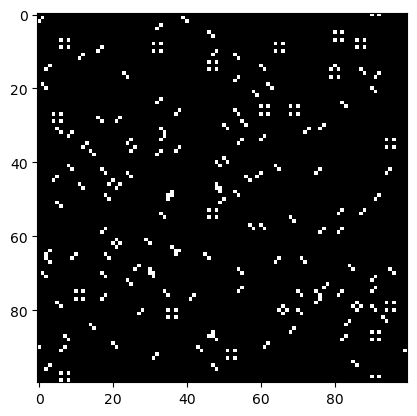

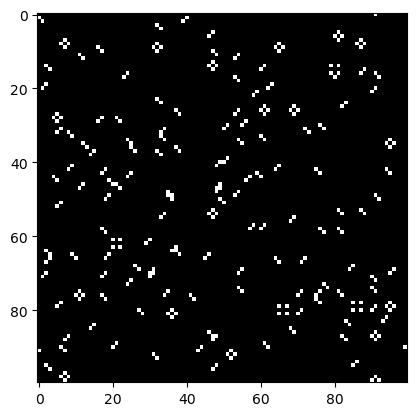

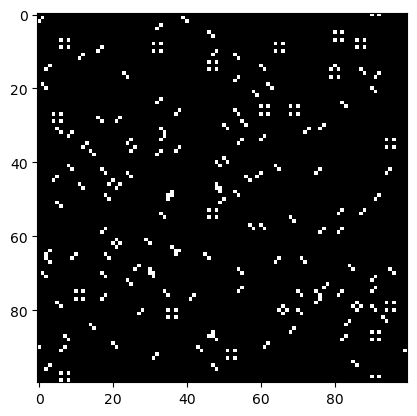

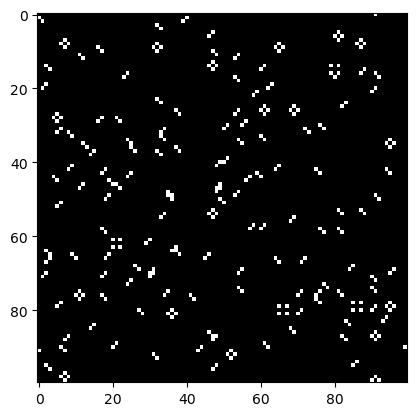

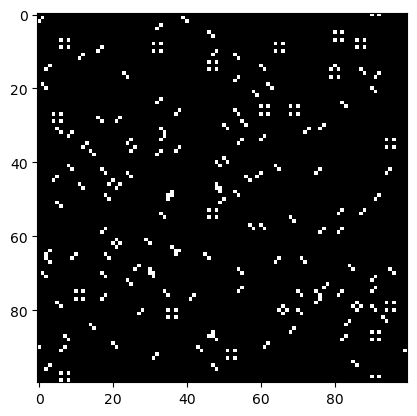

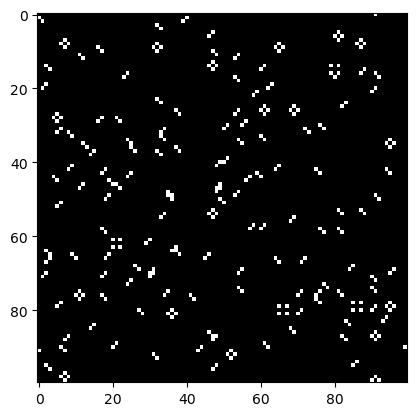

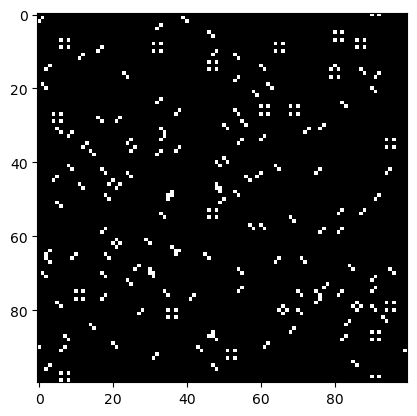

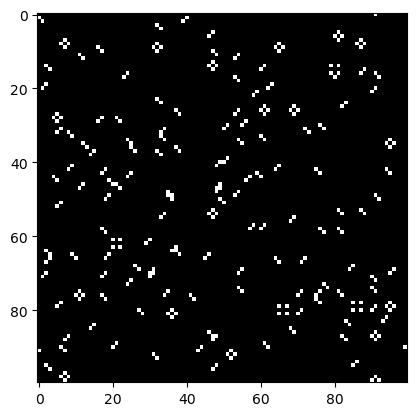

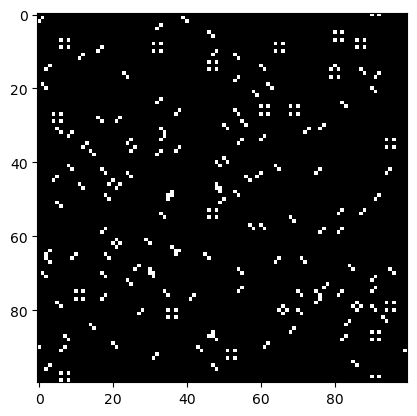

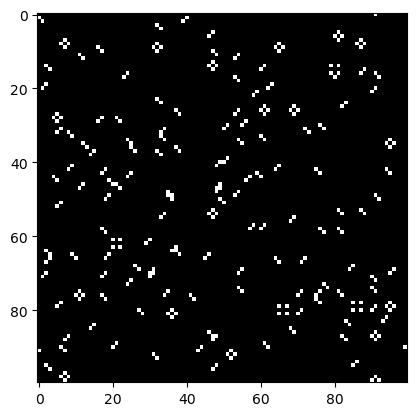

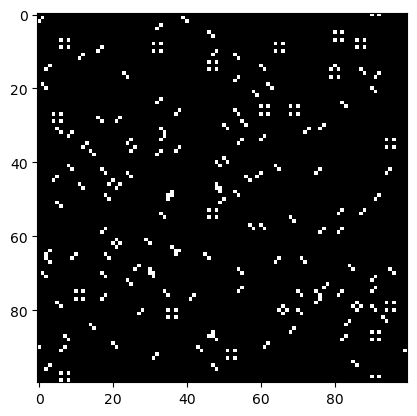

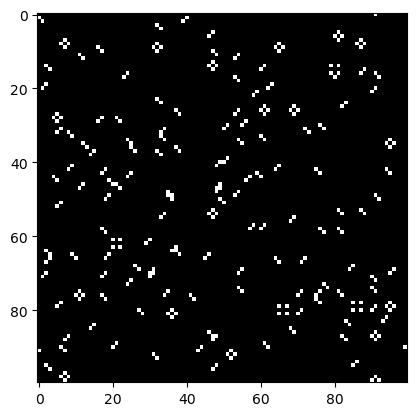

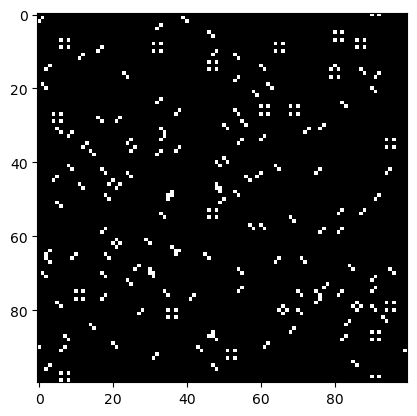

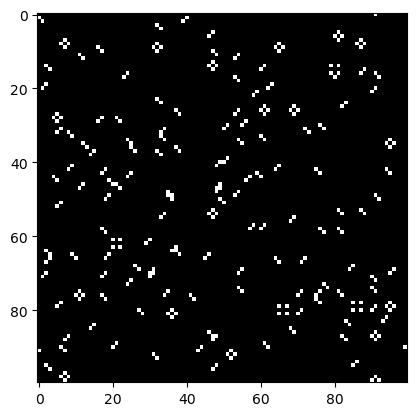

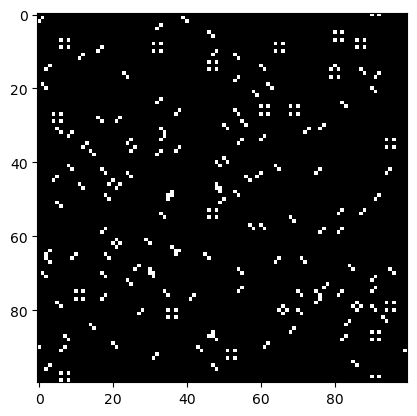

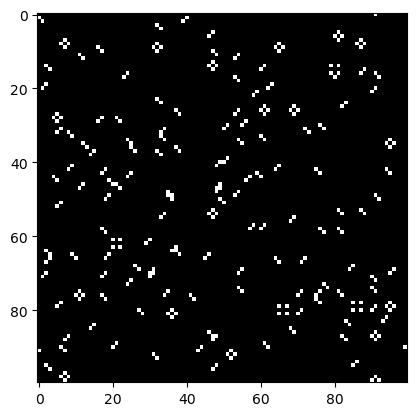

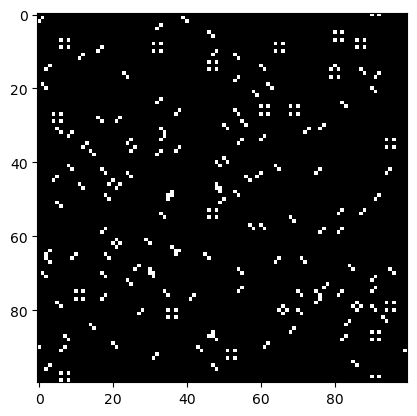

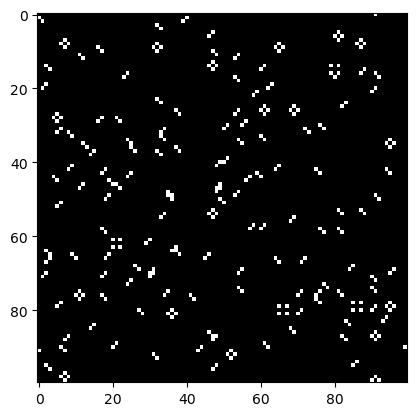

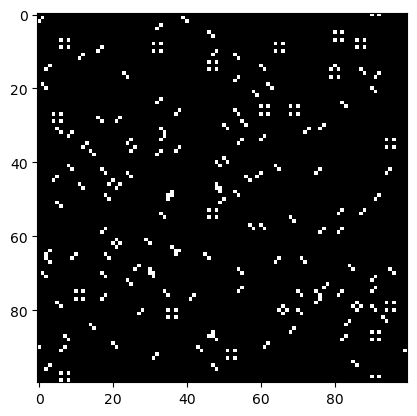

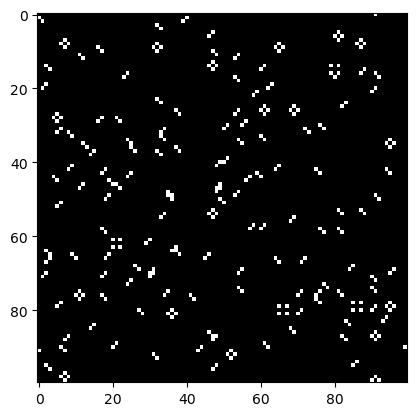

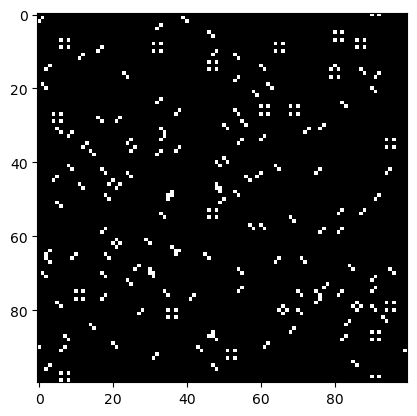

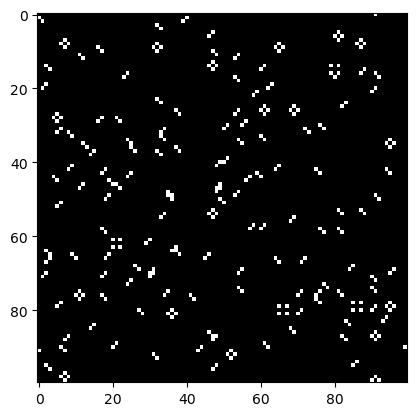

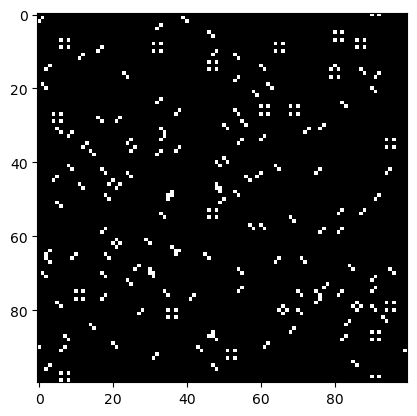

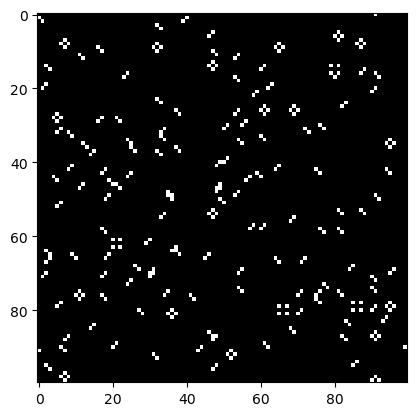

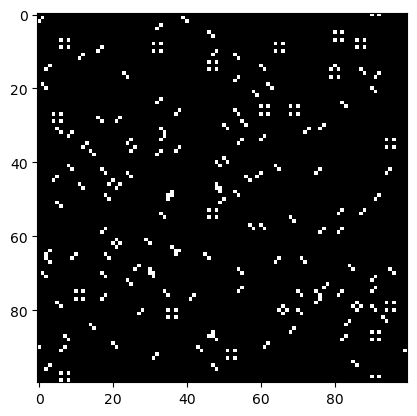

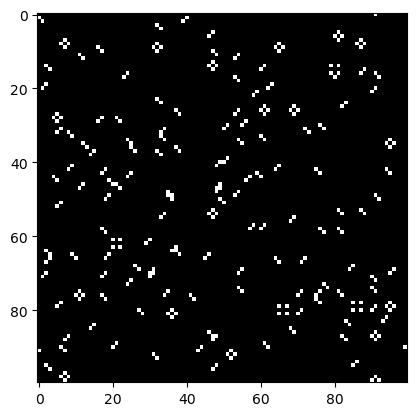

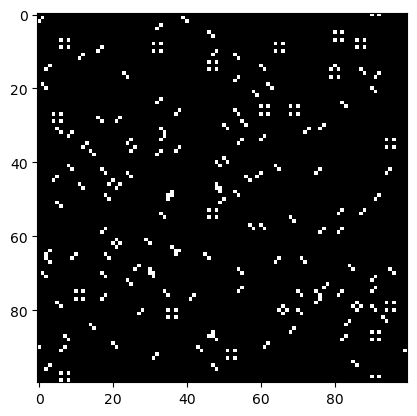

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define the size of the grid
n, m = 100, 100

# Initialize the grid
grid = np.random.randint(5, size=(n, m))

# Define the transition rule
def transition_rule(grid, i, j):
    # Get the state of the neighboring cells
    neighbors = [grid[(i-1)%n][j], grid[(i+1)%n][j], grid[i][(j-1)%m], grid[i][(j+1)%m]]
    # for example, if a cell has 2 neighboring cells that are in state 1:
    if neighbors.count(1) == 2:
        return 1
    else:
        return 0

# Iterate over time steps
timesteps = 50
for t in range(timesteps):
    # Copy the current state of the grid
    temp_grid = grid.copy()
    # Iterate over cells
    for i in range(n):
        for j in range(m):
            # Apply the transition rule
            grid[i][j] = transition_rule(temp_grid, i, j)
    # Plot the grid
    plt.imshow(grid, cmap='gray')
    plt.show()
    plt.pause(0.1)



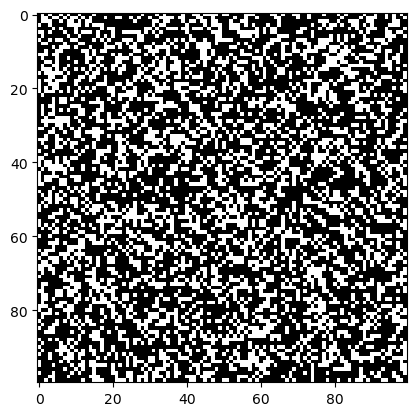

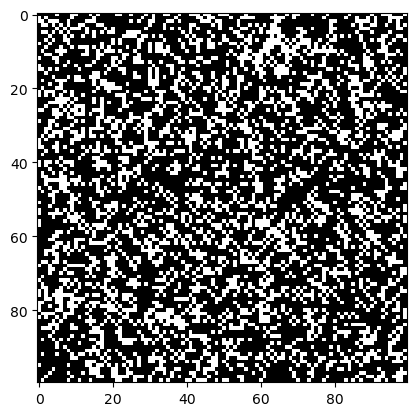

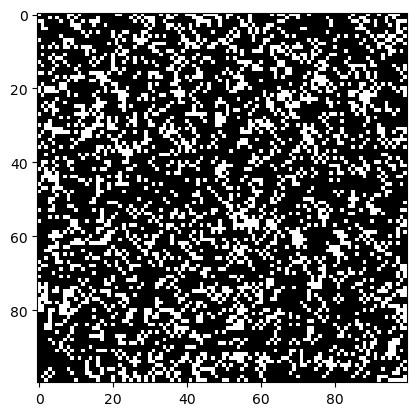

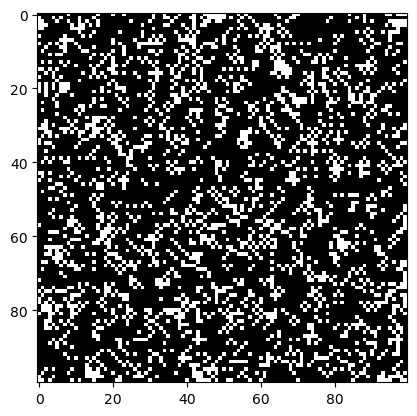

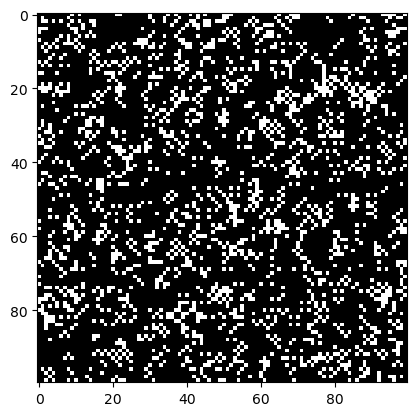

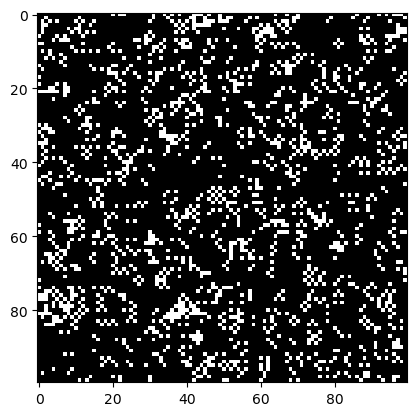

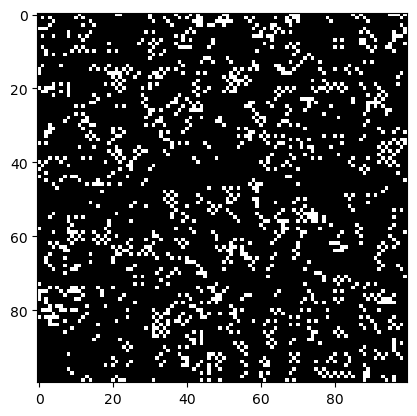

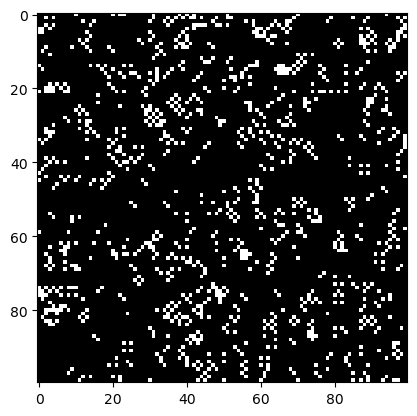

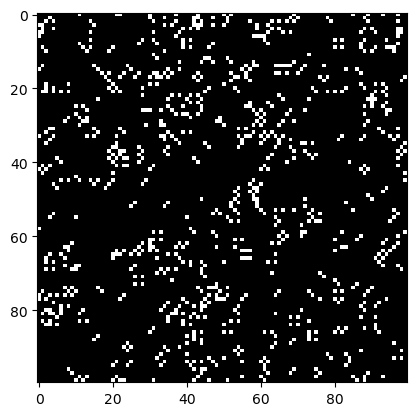

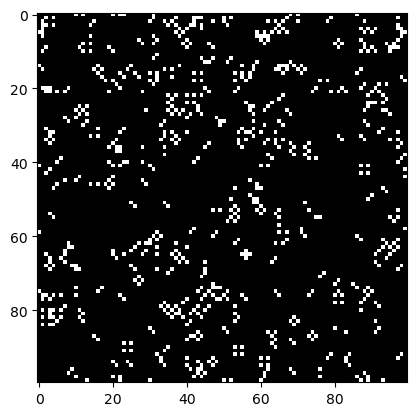

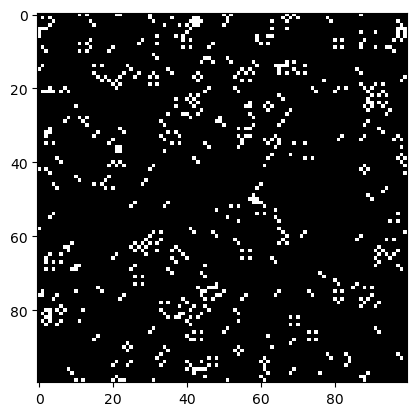

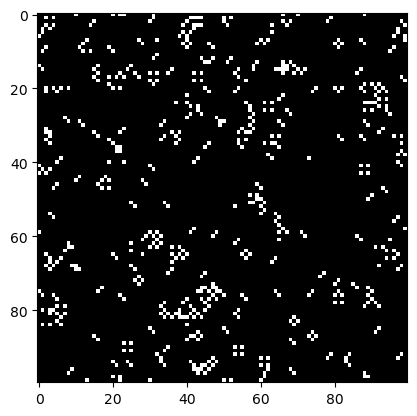

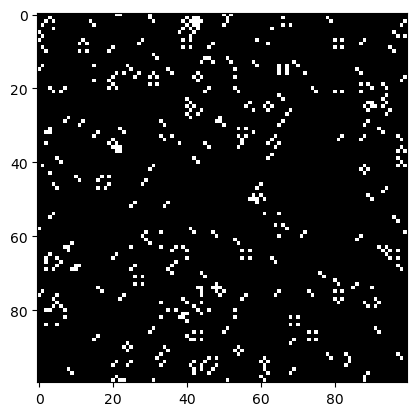

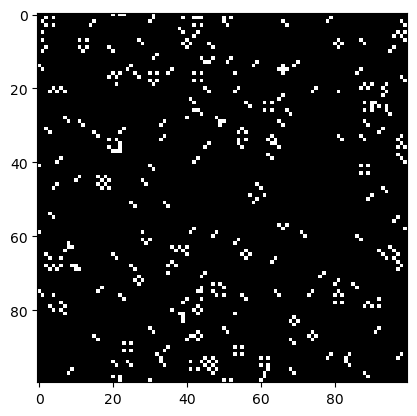

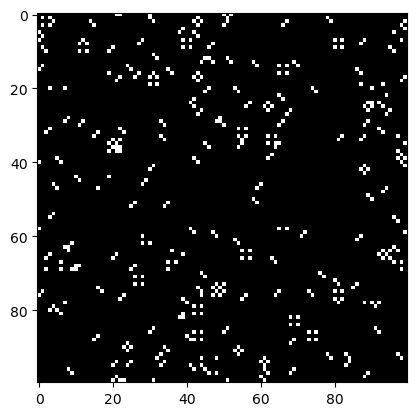

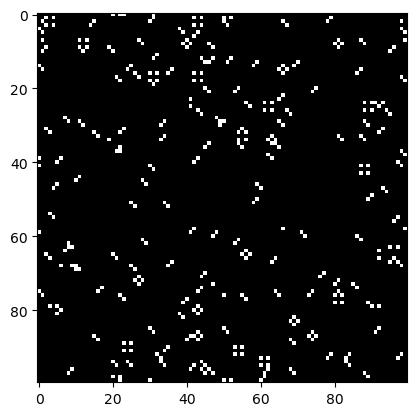

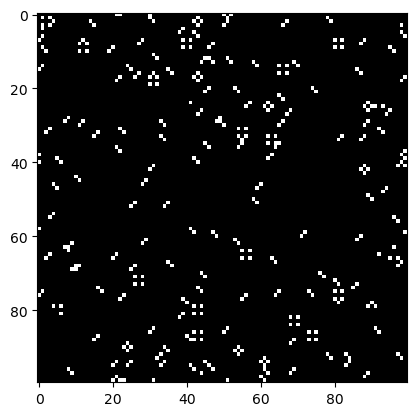

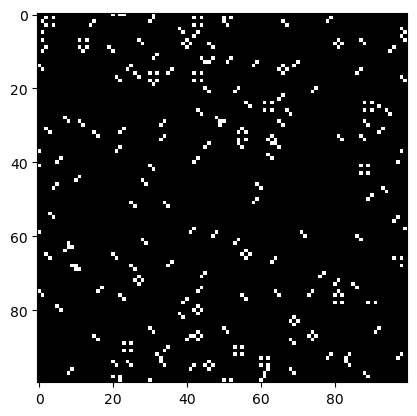

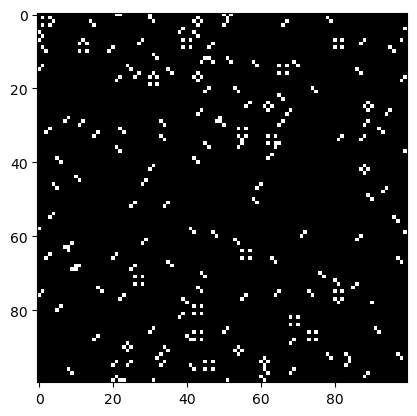

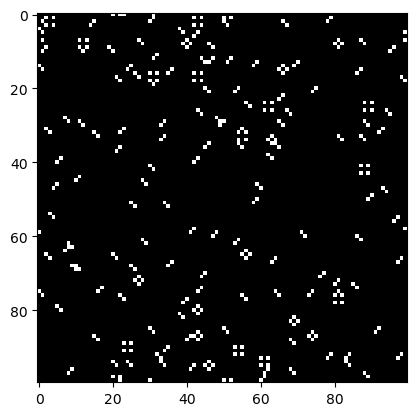

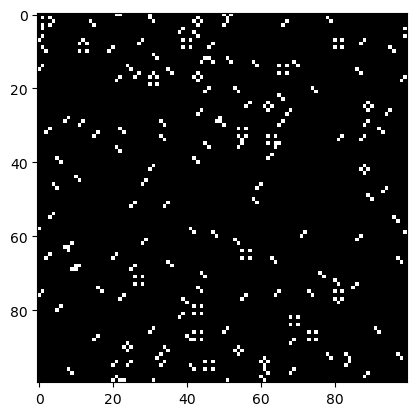

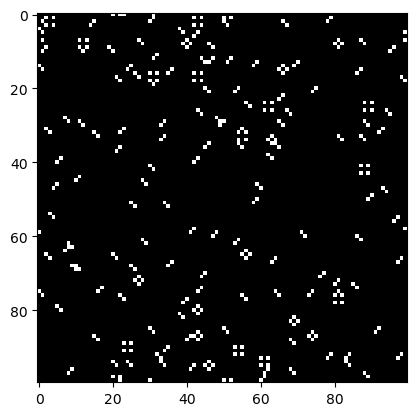

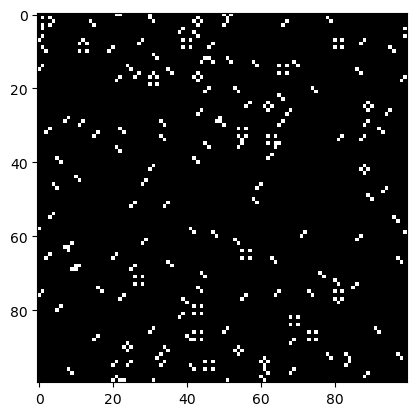

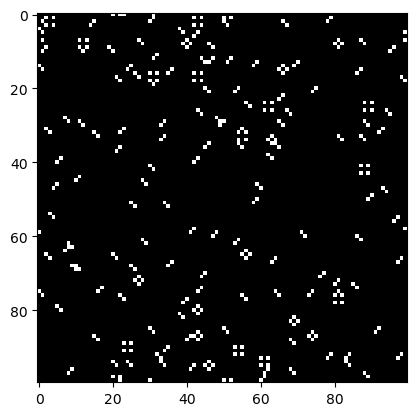

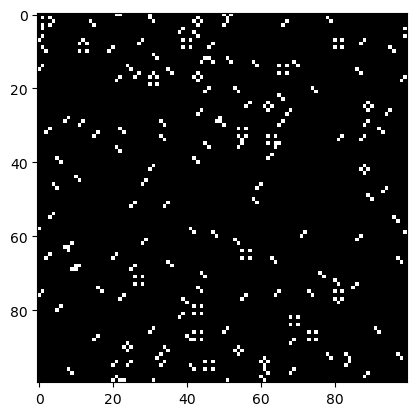

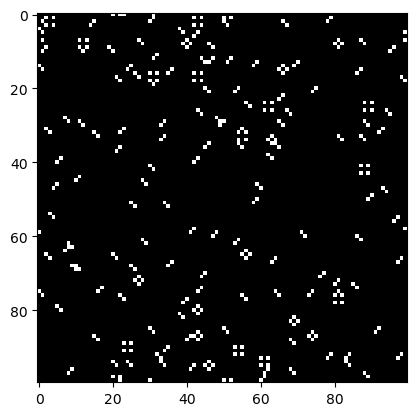

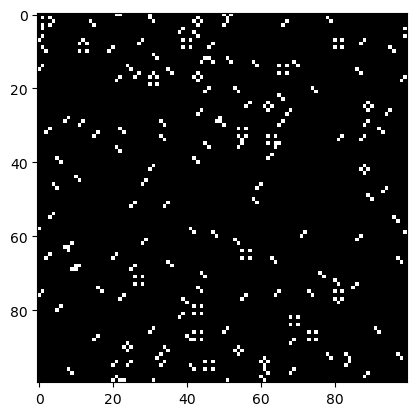

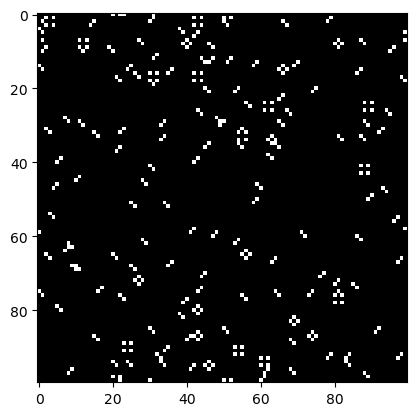

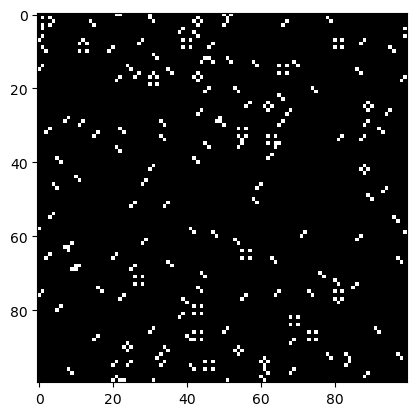

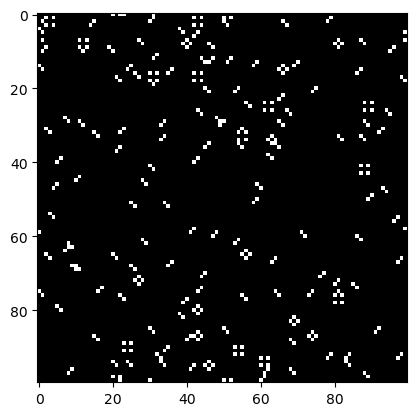

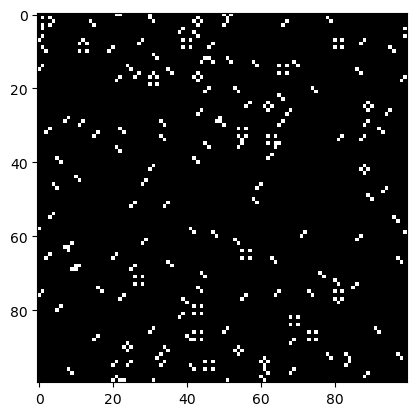

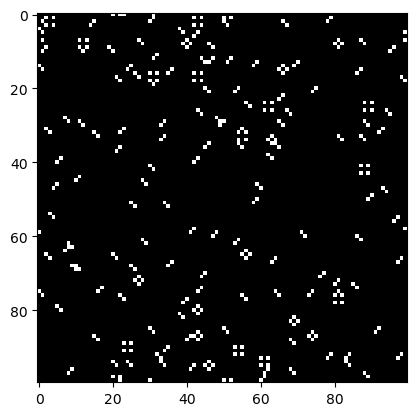

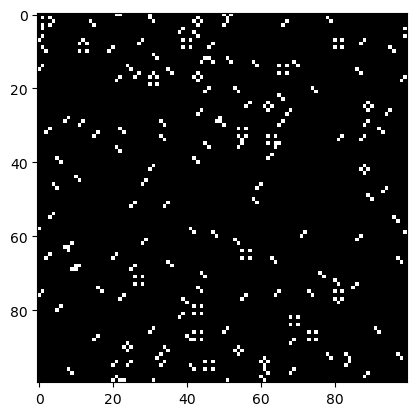

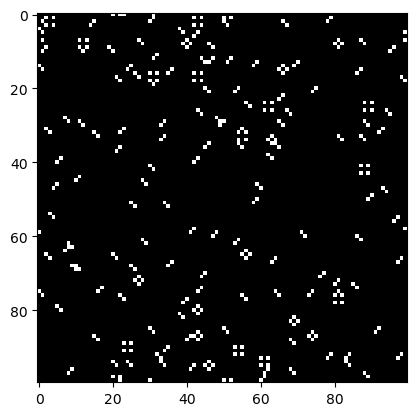

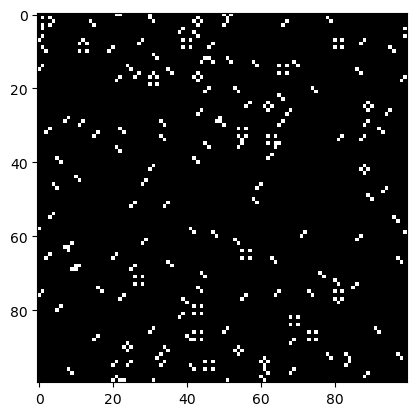

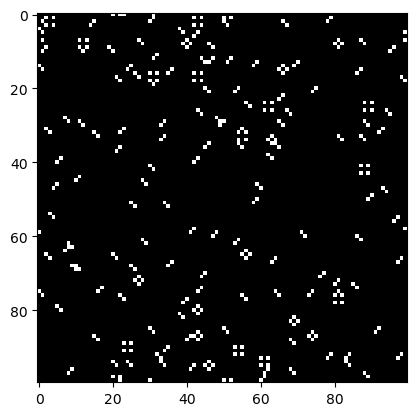

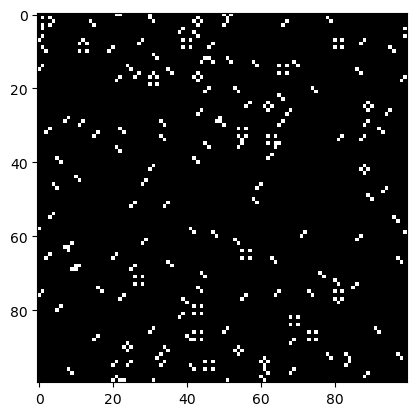

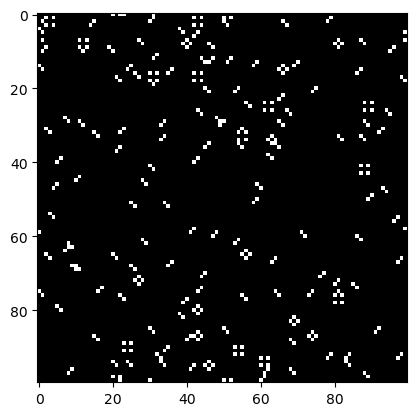

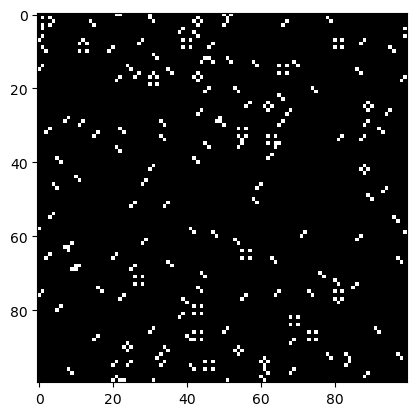

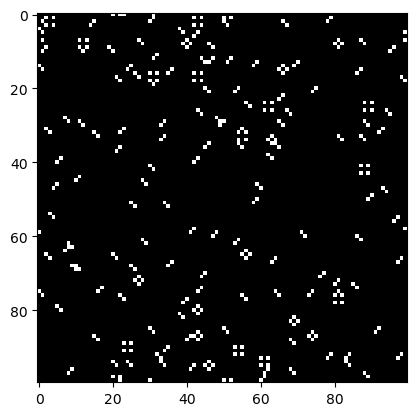

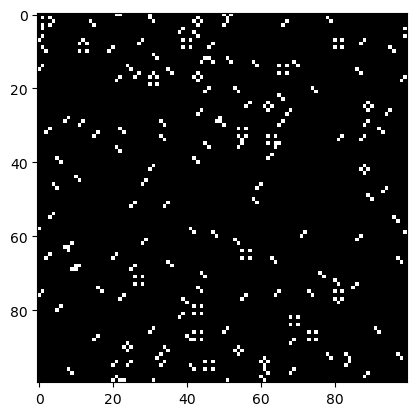

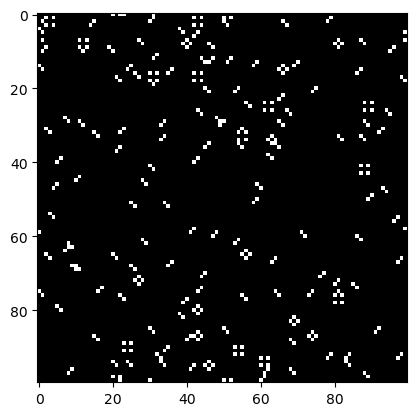

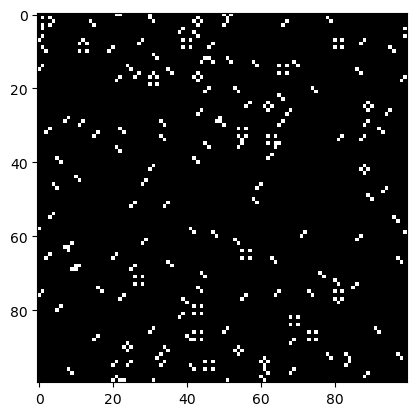

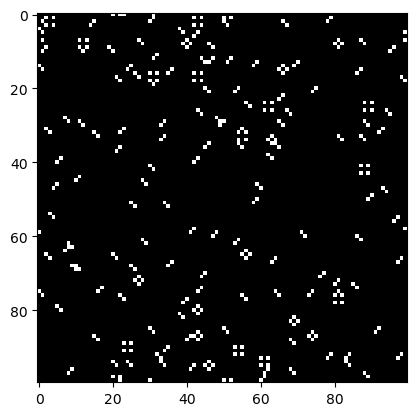

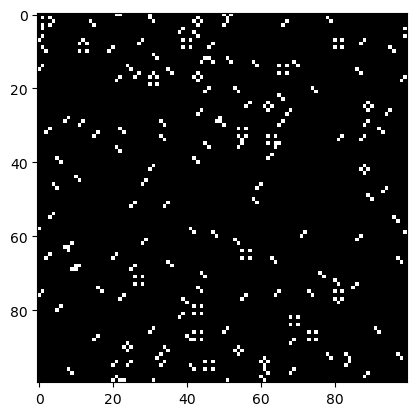

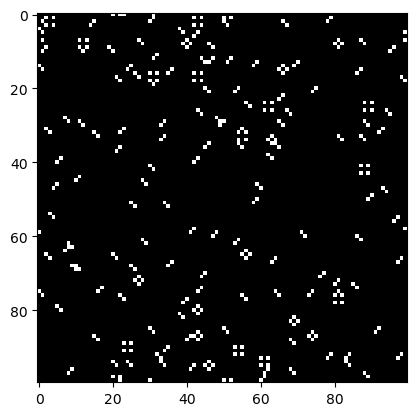

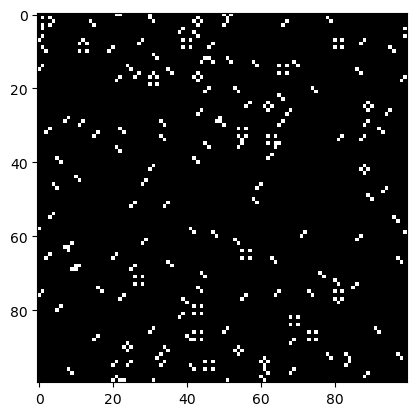

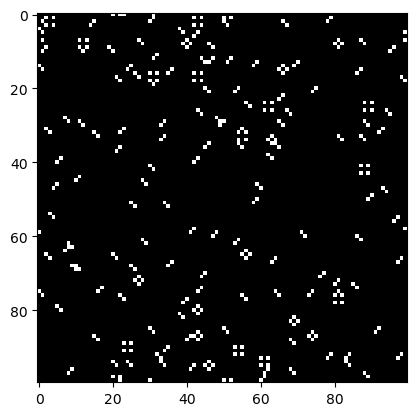

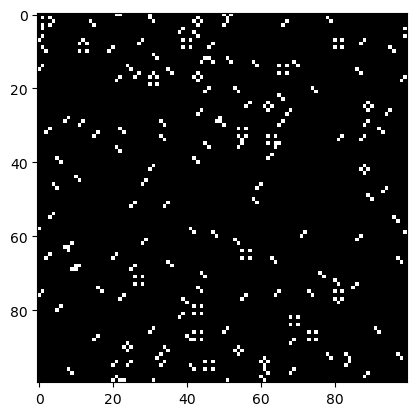

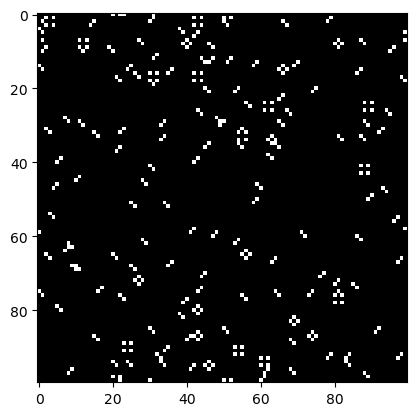

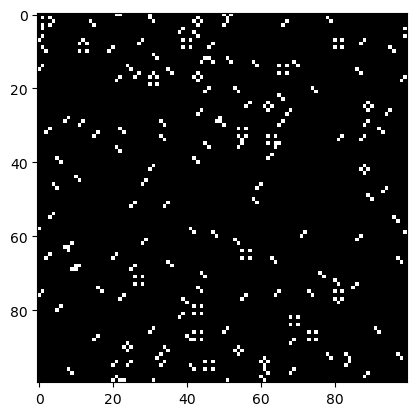

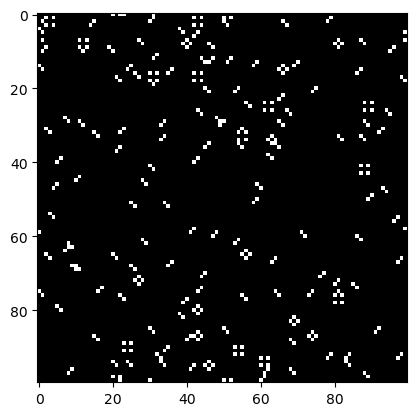

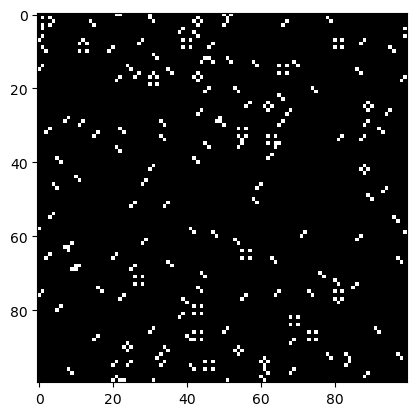

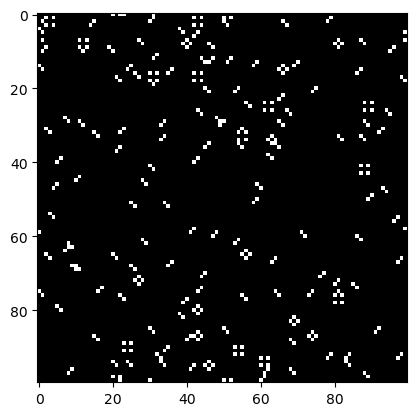

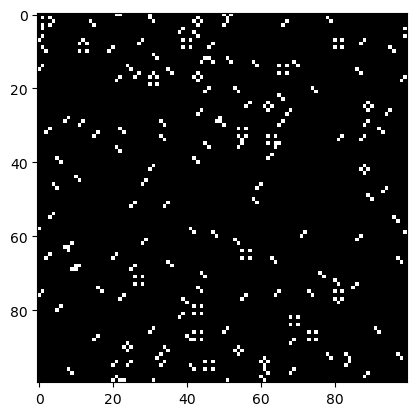

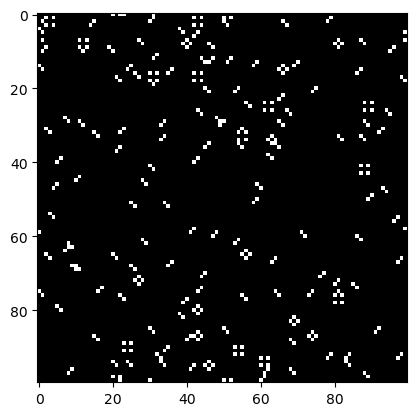

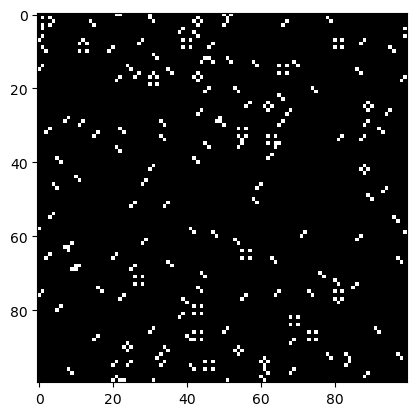

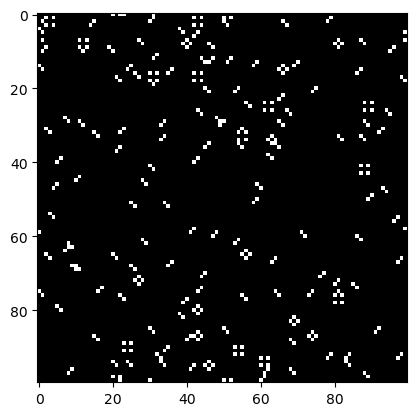

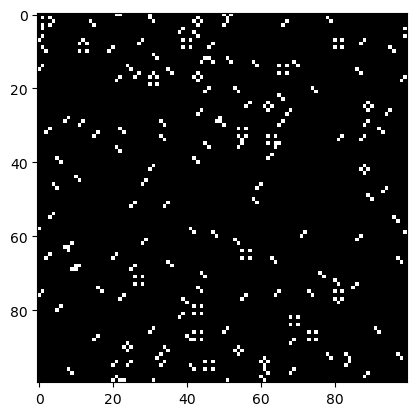

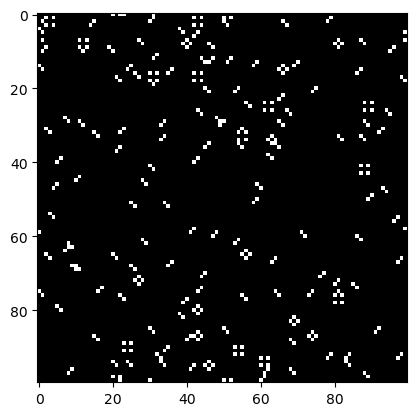

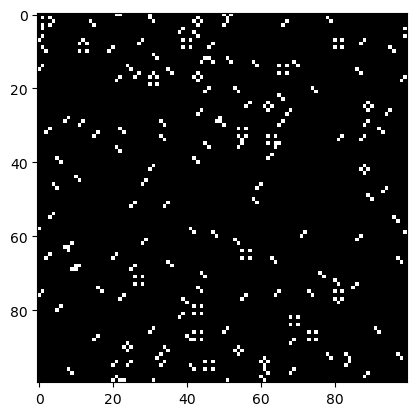

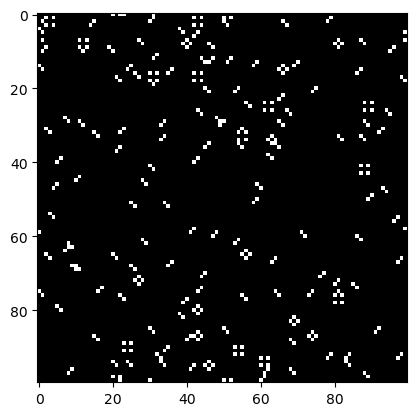

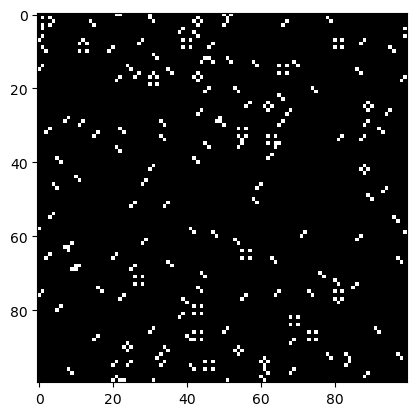

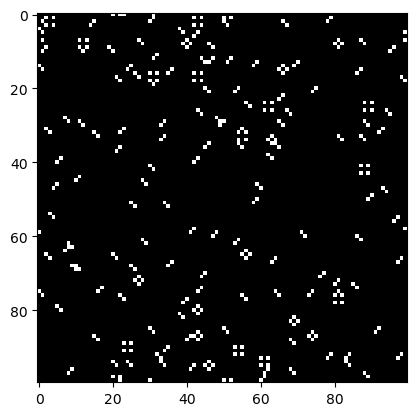

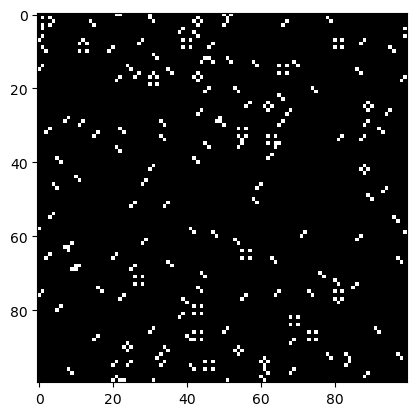

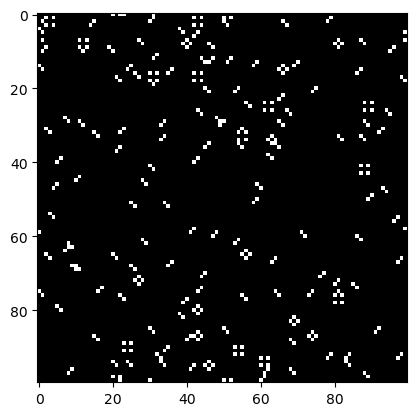

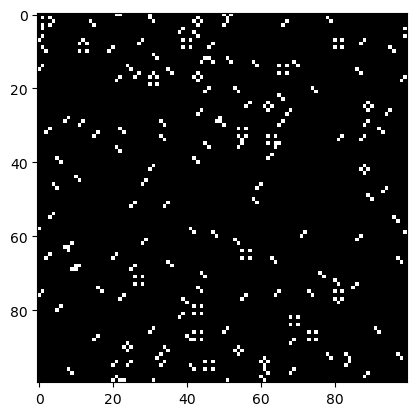

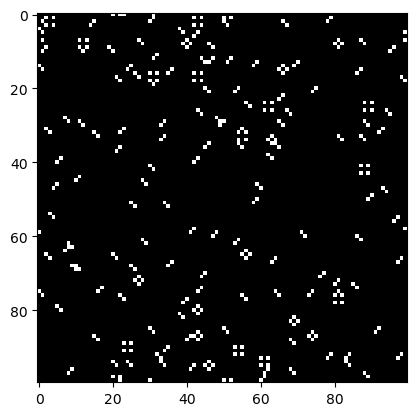

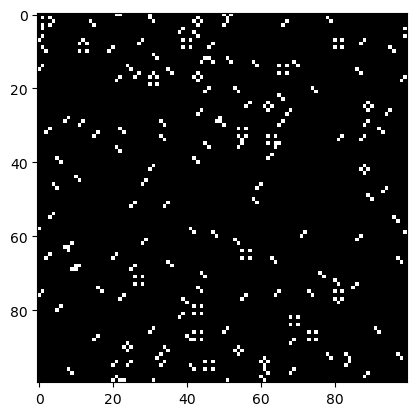

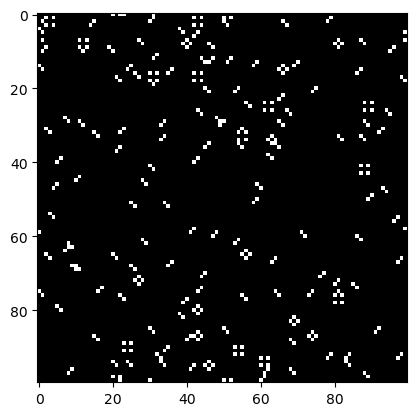

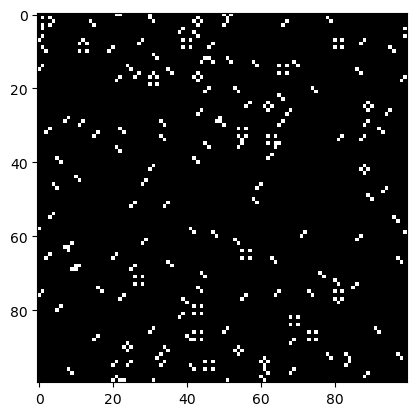

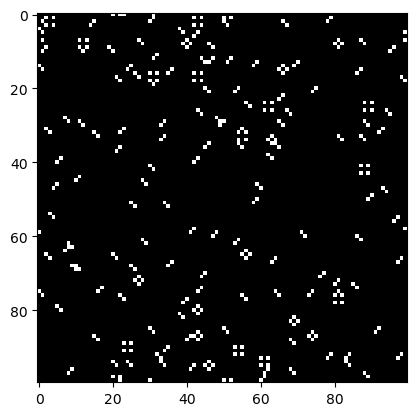

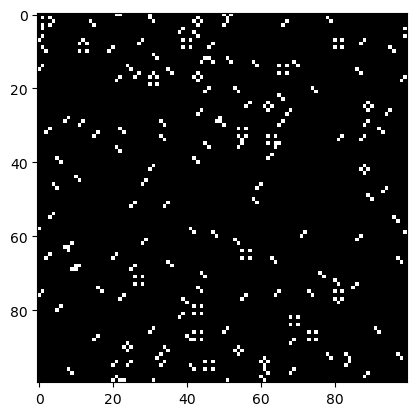

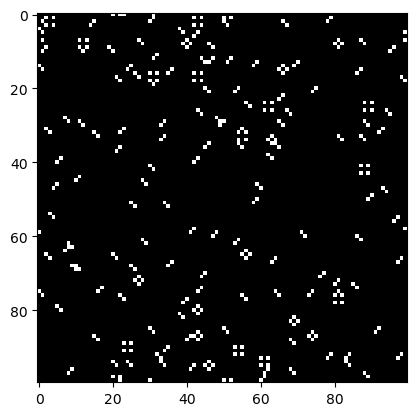

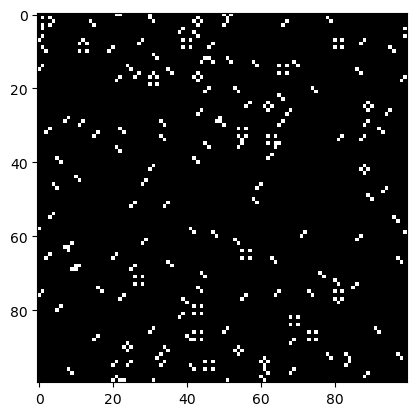

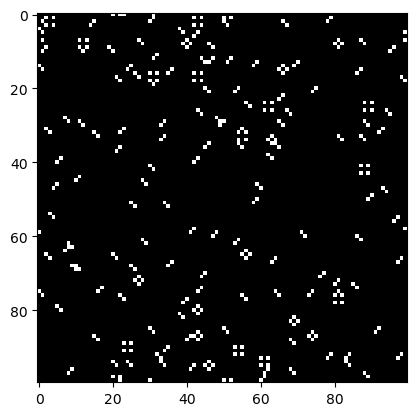

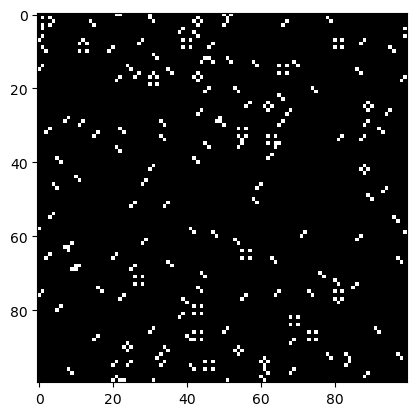

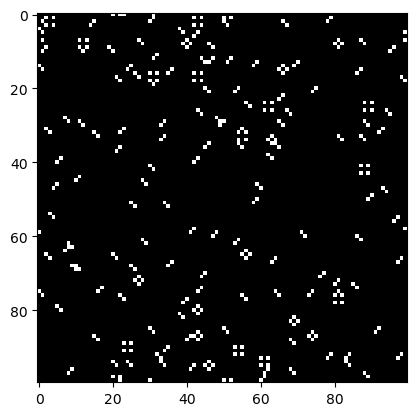

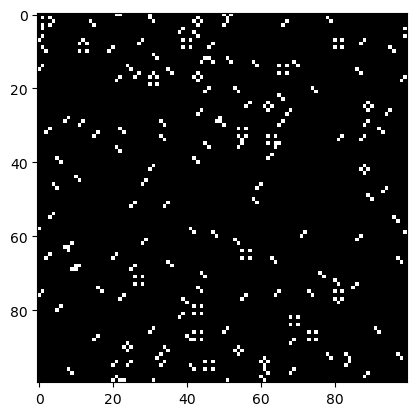

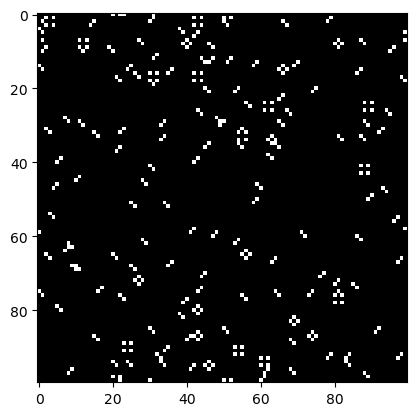

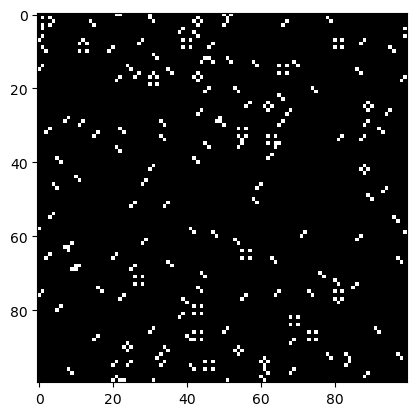

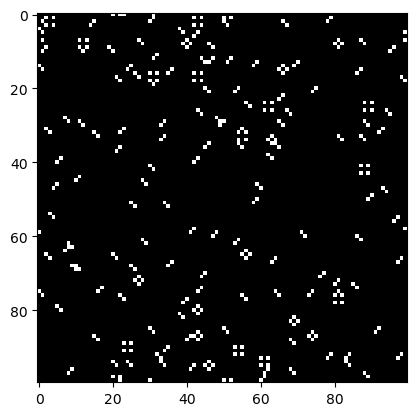

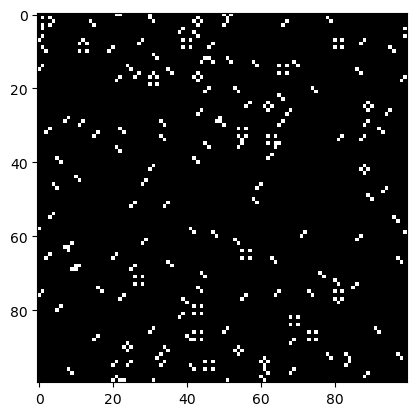

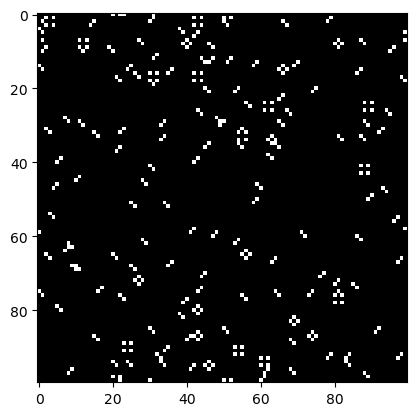

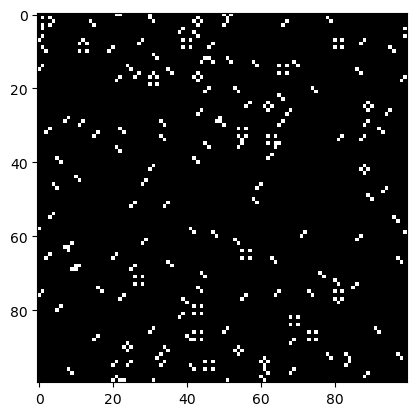

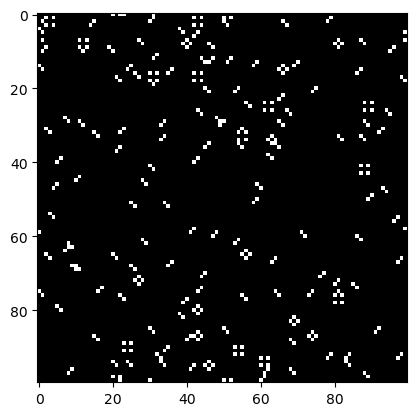

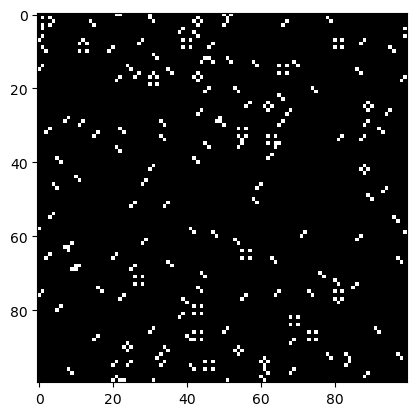

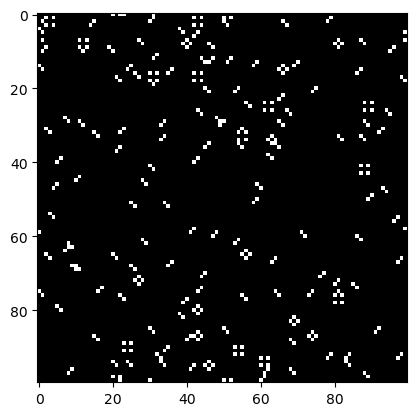

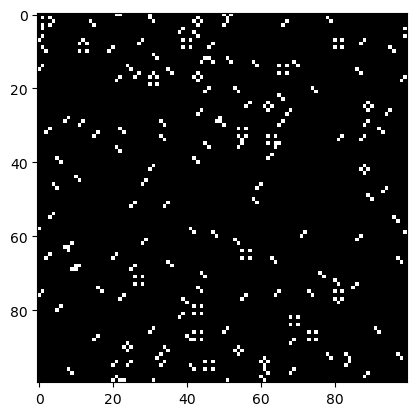

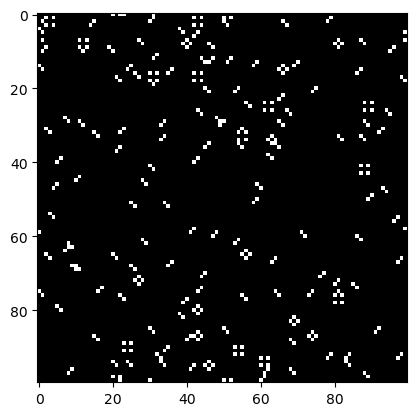

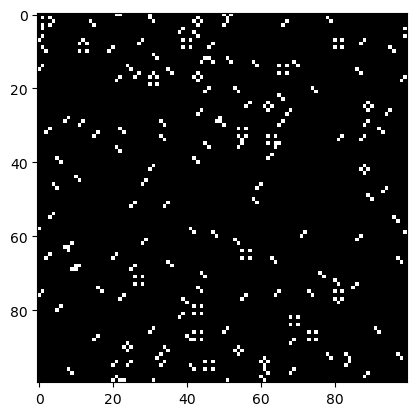

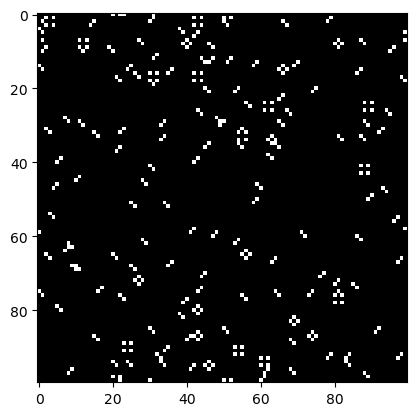

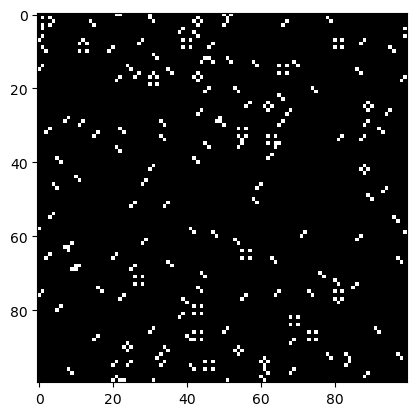

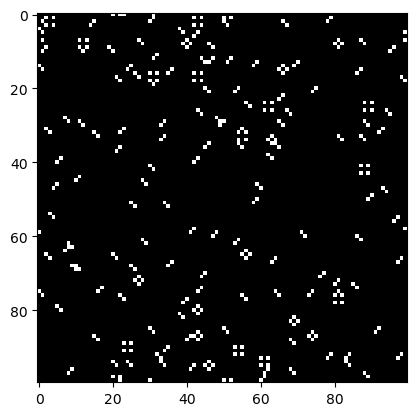

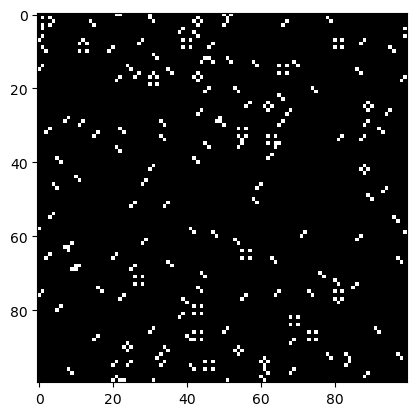

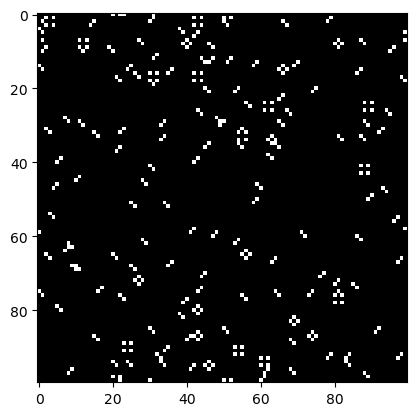

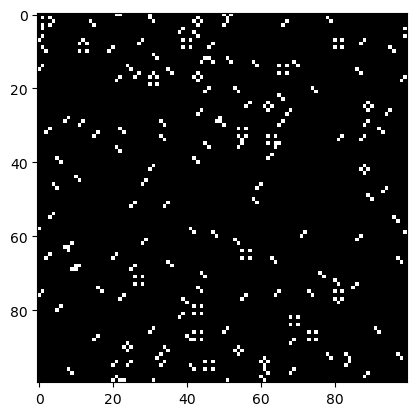

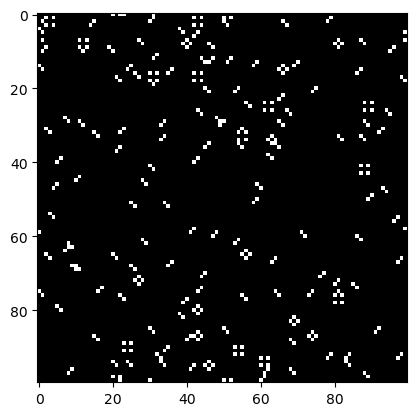

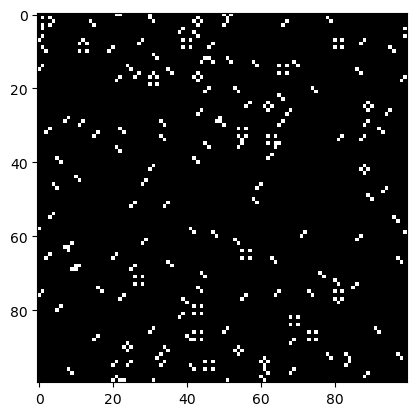

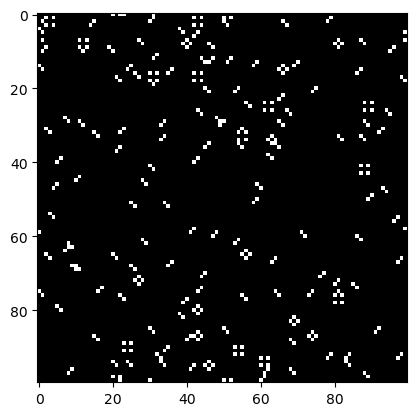

In [21]:
import numpy as np
import matplotlib.pyplot as plt



# Define the size of the grid
timesteps = 100
# Initialize the grid
grid = np.random.randint(2, size=(100, 100))

# Define the transition rule
def transition_rule(neighbors):
    # for example, if a cell has 2 neighboring cells that are in state 1:
    if neighbors.count(1) == 2:
        return 1
    else:
        return 0

# Iterate over time steps
for t in range(timesteps):
    # Copy the current state of the grid
    temp_grid = grid.copy()
    # Iterate over cells
    for i in range(n):
        for j in range(m):
            # Get the state of the neighboring cells
            neighbors = [temp_grid[(i-1)%n][j], temp_grid[(i+1)%n][j], temp_grid[i][(j-1)%m], temp_grid[i][(j+1)%m]]
            # Apply the transition rule
            grid[i][j] = transition_rule(neighbors)
    # Plot the grid
    plt.imshow(grid, cmap='gray')
    plt.show()
    plt.pause(0.1)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the size of the grid
timesteps = 100

# Initialize the grid
grid = np.array([[2, -1, 0, 0, 0], [-1, 2, -1, 0, 0], [0, -1, 2, -1, 0], [0, 0, -1, 2, -1], [0, 0, 0, -1, 2]])

# Define the transition rule
def transition_rule(neighbors):
    # for example, if a cell has 2 neighboring cells that are in state 1:
    if neighbors.count(1) == 9:
        return 1
    else:
        return 0

# Iterate over time steps
for t in range(timesteps):
    # Copy the current state of the grid
    temp_grid = grid.copy()

    # Iterate over cells
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            # Get the state of the neighboring cells
            neighbors = [temp_grid[(i-1)%grid.shape[0]][j], temp_grid[(i+1)%grid.shape[0]][j],
                         temp_grid[i][(j-1)%grid.shape[1]], temp_grid[i][(j+1)%grid.shape[1]]]
            # Apply the transition rule
            grid[i][j] = transition_rule(neighbors)

    # Plot the grid
    plt.imshow(grid, cmap='jet')
    plt.show()
    plt.pause(0.1)


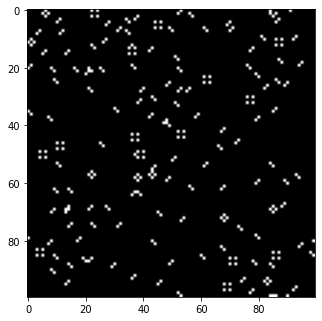

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define the size of the grid
n, m = 100, 100
timesteps = 100

# Initialize the grid
grid = np.random.randint(2, size=(n, m))

# Define the transition rule
def transition_rule(grid, i, j):
    # Get the state of the neighboring cells
    neighbors = [grid[(i-1)%n][j], grid[(i+1)%n][j], grid[i][(j-1)%m], grid[i][(j+1)%m]]
    # for example, if a cell has 2 neighboring cells that are in state 1:
    if neighbors.count(1) == 2:
        return 1
    else:
        return 0

# Create a figure and axes
fig, ax = plt.subplots(frameon=False)

# Plot the initial state of the grid
im = ax.imshow(grid, cmap='gray')

# Define the update function
def update(frame):
    global grid
    temp_grid = grid.copy()
    for i in range(n):
        for j in range(m):
            grid[i][j] = transition_rule(temp_grid, i, j)
    im.set_data(grid)


# Remove whitespace around the animation
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)

# Create the animation
ani = FuncAnimation(fig, update, frames=range(timesteps), repeat=False)

# Save the animation as a video
ani.save("von_neumann_automaton.mp4", writer='ffmpeg')


In [10]:
!pip install opencv-python



In [59]:
import numpy as np
from multiprocessing import Pool
import cv2

# Define the seed value for the Julia set (-0.4, 0.6)
seed_value = complex(-0.4, 0.6)
max_iterations = 256

# Define the escape time function for the Julia set
def escape_time(c):
    z = c
    for i in range(max_iterations):
        z = z*z + seed_value
        if abs(z) > 2:
            return i, int(i*255/256), int(i*255/256), int(i*255/256)
    return max_iterations, 0, 0, 0

# Define the function to generate the Julia set
def generate_julia(coord):
    x,y = coord
    julia_set = np.zeros((800, 800, 4), dtype=np.uint8)
    for x, y in product(range(x, x+200), range(y, y+200)):
        c = complex(x/200, y/200)
        julia_set[x+400, y+400] = escape_time(c)
    return julia_set

# Create a pool of worker processes
with Pool() as p:
    # Divide the x and y ranges into chunks and generate the Julia set in parallel
    julia_set = np.vstack(p.imap_unordered(generate_julia, ((x, y) for x in range(-400, 400, 200) for y in range(-400, 400, 200)), chunksize=1))

#save the image using OpenCV
cv2.imwrite("julia_set.png", julia_set)

plt.show()

/tmp/ipykernel_749/1395577845.py:30: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  julia_set = np.vstack(p.imap_unordered(generate_julia, ((x, y) for x in range(-400, 400, 200) for y in range(-400, 400, 200)), chunksize=1))


In [60]:
import numpy as np
from multiprocessing import Pool
import cv2
import random

# Define the seed value for the Julia set (-0.4, 0.6)
seed_value = complex(-0.8, 0.1)
max_iterations = 256

# Define the escape time function for the Julia set
def escape_time(c):
    z = c
    for i in range(max_iterations):
        z = z*z + seed_value
        if abs(z) > 2:
            return i, random.randint(0,255), random.randint(0,255), random.randint(0,255)
    return max_iterations, 0, 0, 0

# Define the function to generate the Julia set
def generate_julia(coord):
    x,y = coord
    julia_set = np.zeros((800, 800, 4), dtype=np.uint8)
    for x, y in product(range(x, x+800), range(y, y+800)):
        c = complex(x/800, y/800)
        julia_set[x+400, y+400] = escape_time(c)
    return julia_set

# Create a pool of worker processes
with Pool() as p:
    # Divide the x and y ranges into chunks and generate the Julia set in parallel
    julia_set = np.vstack(p.imap_unordered(generate_julia, ((x, y)
        for x in range(-400, 400, 800) for y in range(-400, 400, 800)), chunksize=1))
#save the image using OpenCV
cv2.imwrite("julia_set.png", julia_set)


/tmp/ipykernel_749/2431622546.py:31: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  julia_set = np.vstack(p.imap_unordered(generate_julia, ((x, y)


True

In [61]:
import numpy as np
from multiprocessing import Pool
import cv2

# Define the seed value for the Julia set (-0.4, 0.6)
seed_value = complex(-0.4, 0.6)
max_iterations = 555

def color_map(n, max_iterations):
    """
    Map the number of iterations to a color value
    """
    # Define the color map
    color_map = [[0, 0, 0] if n == max_iterations else [int(255 * (n / max_iterations)), int(255 * (n / max_iterations)), int(255 * (n / max_iterations))] for n in range(max_iterations)]
    return color_map[n]
    
# Define the escape time function for the Julia set
def escape_time(c):
    z = c
    for i in range(max_iterations):
        z = z*z + seed_value
        if abs(z) > 2:
            return i
    return max_iterations

# Define the function to generate the Julia set
def generate_julia(coord):
    x,y = coord
    julia_set = np.zeros((800, 800, 3), dtype=np.uint8)
    for i, j in np.ndindex(julia_set.shape[:2]):
        c = complex(x + i/800, y + j/800)
        julia_set[i, j] = color_map(escape_time(c), max_iterations)
    return julia_set

# Create a pool of worker processes
with Pool() as p:
    # Divide the x and y ranges into chunks and generate the Julia set in parallel
    julia_set = np.vstack(p.imap_unordered(generate_julia, ((x, y)
        for x in np.linspace(-2, 2, 4) for y in np.linspace(-2, 2, 4)), chunksize=1))
#save the image using OpenCV
cv2.imwrite("julia_set.png", julia_set)



/tmp/ipykernel_749/3233097612.py:38: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  julia_set = np.vstack(p.imap_unordered(generate_julia, ((x, y)


Traceback (most recent call last):
  Input In [61] in <cell line: 36>
    julia_set = np.vstack(p.imap_unordered(generate_julia, ((x, y)
  File <__array_function__ internals>:180 in vstack
  File /opt/conda/lib/python3.8/site-packages/numpy/core/shape_base.py:279 in vstack
    arrs = atleast_2d(*tup)
  File /opt/conda/lib/python3.8/multiprocessing/pool.py:868 in next
    raise value
IndexError: list index out of range

Use %tb to get the full traceback.


In [62]:
import numpy as np
from multiprocessing import Pool
import cv2

# Define the seed value for the Julia set (-0.4, 0.6)
seed_value = complex(-0.4, 0.6)
max_iterations = 555

def color_map(n, max_iterations):
    """
    Map the number of iterations to a color value
    """
    # Define the color map
    color_map = [[0, 0, 0] if n == max_iterations else [int(255 * (n / max_iterations)), int(255 * (n / max_iterations)), int(255 * (n / max_iterations))] for n in range(max_iterations)]
    return color_map[n]
    
# Define the escape time function for the Julia set
def escape_time(c):
    z = c
    for i in range(max_iterations):
        z = z*z + seed_value
        if abs(z) > 2:
            return i
    return max_iterations

# Define the function to generate the Julia set
def generate_julia(coord):
    x,y = coord
    julia_set = np.zeros((800, 800, 3), dtype=np.uint8)
    for i, j in np.ndindex(julia_set.shape[:2]):
        c = complex(x + i/800, y + j/800)
        julia_set[i, j] = color_map(escape_time(c), max_iterations)
    return julia_set

# Create a pool of worker processes
with Pool() as p:
    # Divide the x and y ranges into chunks and generate the Julia set in parallel
    julia_set = np.vstack(p.imap_unordered(generate_julia, ((x, y)
        for x in np.linspace(-2, 2, 4) for y in np.linspace(-2, 2, 4)), chunksize=1))
#save the image using OpenCV
cv2.imwrite("julia_set.png", julia_set)


/tmp/ipykernel_749/1522355177.py:38: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  julia_set = np.vstack(p.imap_unordered(generate_julia, ((x, y)


Traceback (most recent call last):
  Input In [62] in <cell line: 36>
    julia_set = np.vstack(p.imap_unordered(generate_julia, ((x, y)
  File <__array_function__ internals>:180 in vstack
  File /opt/conda/lib/python3.8/site-packages/numpy/core/shape_base.py:279 in vstack
    arrs = atleast_2d(*tup)
  File /opt/conda/lib/python3.8/multiprocessing/pool.py:868 in next
    raise value
IndexError: list index out of range

Use %tb to get the full traceback.


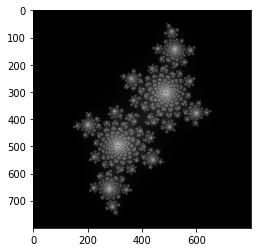

In [8]:
import numpy as np
from multiprocessing import Pool
import cv2
# Define the seed value for the Julia set (-0.4, 0.6)
seed_value = complex(-0.4, 0.6)
max_iterations = 256

# Define the escape time function for the Julia set
def escape_time(c):
    z = c
    for i in range(max_iterations):
        z = z*z + seed_value
        if abs(z) > 2:
            return i, int(i*255/256), int(i*255/256), int(i*255/256)
    return max_iterations, 0, 0, 0
# Define the function to generate the Julia set
def generate_julia(coord):
    x,y = coord
    julia_set = np.zeros((800, 800, 4), dtype=np.uint8)
    for x, y in product(range(x, x+800), range(y, y+800)):
        c = complex(x/256, y/256)
        julia_set[x+400, y+400] = escape_time(c)
    return julia_set
# Create a pool of worker processes
with Pool() as p:
    # Divide the x and y ranges into chunks and generate the Julia set in parallel
      julia_set = np.vstack(p.map(generate_julia, [(x, y) for x in range(-400, 400, 800) for y in range(-400, 400, 800)]))

#save the image using OpenCV
cv2.imwrite("julia_set.png", julia_set)
import matplotlib.pyplot as plt
# read the image
img = cv2.imread("julia_set.png")
# show the image
plt.imshow(img)
plt.show()



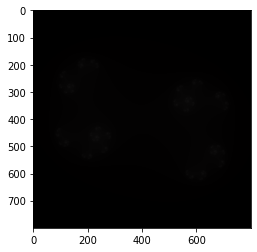

In [6]:
import numpy as np
from multiprocessing import Pool
import cv2
# Define the seed value for the Julia set (-0.4, 0.6)
seed_value = complex(0.618033, -0.314156)
max_iterations = 256

# Define the escape time function for the Julia set
def escape_time(c):
    z = c
    for i in range(max_iterations):
        z = z*z + seed_value
        if abs(z) > 2:
            return i, int(i*255/256), int(i*255/256), int(i*255/256)
    return max_iterations, 0, 0, 0
# Define the function to generate the Julia set
def generate_julia(coord):
    x,y = coord
    julia_set = np.zeros((800, 800, 4), dtype=np.uint8)
    for x, y in product(range(x, x+800), range(y, y+800)):
        c = complex(x/256, y/256)
        julia_set[x+400, y+400] = escape_time(c)
    return julia_set
# Create a pool of worker processes
with Pool() as p:
    # Divide the x and y ranges into chunks and generate the Julia set in parallel
      julia_set = np.concatenate([generate_julia((x, y)) for x in range(-400, 400, 800) for y in range(-400, 400, 800)], axis=0)

#save the image using OpenCV
cv2.imwrite("julia_set.png", julia_set)
import matplotlib.pyplot as plt
# read the image
img = cv2.imread("julia_set.png")
# show the image
plt.imshow(img)
plt.show()


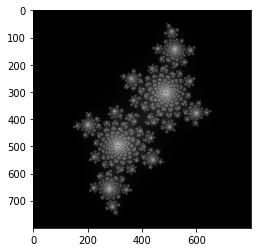

Execution time:  7.466160781215876


In [13]:
import timeit

def timed_code():
    import numpy as np
    from multiprocessing import Pool
    import cv2
    # Define the seed value for the Julia set (-0.4, 0.6)
    seed_value = complex(-0.4, 0.6)
    max_iterations = 256
    # Define the escape time function for the Julia set
    def escape_time(c):
        z = c
        for i in range(max_iterations):
            z = z*z + seed_value
            if abs(z) > 2:
                return i, int(i*255/256), int(i*255/256), int(i*255/256)
        return max_iterations, 0, 0, 0
    # Define the function to generate the Julia set
    def generate_julia(coord):
        x,y = coord
        julia_set = np.zeros((800, 800, 4), dtype=np.uint8)
        for x, y in product(range(x, x+800), range(y, y+800)):
            c = complex(x/256, y/256)
            julia_set[x+400, y+400] = escape_time(c)
        return julia_set
    # Create a pool of worker processes
    with Pool() as p:
        # Divide the x and y ranges into chunks and generate the Julia set in parallel
          julia_set = np.concatenate([generate_julia((x, y)) for x in range(-400, 400, 800) for y in range(-400, 400, 800)], axis=0)


    #save the image using OpenCV
    cv2.imwrite("julia_set.png", julia_set)
    import matplotlib.pyplot as plt
    # read the image
    img = cv2.imread("julia_set.png")
    # show the image
    plt.imshow(img)
    plt.show()

execution_time = timeit.timeit(timed_code, number=1)
print("Execution time: ", execution_time)
